### Visualising the data

#### What files are in the input folder:

In [1]:
# All imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc


In [2]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 3
['sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [3]:
#Loading Train and Test Data

df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")

print("{} observations and {} features in train set.".format(df_train.shape[0], df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0], df_test.shape[1]))

200000 observations and 202 features in train set.
200000 observations and 201 features in test set.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Let's now look at the target score 

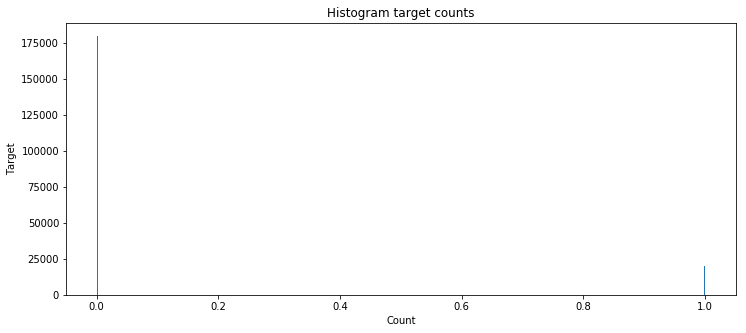

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [9]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Let's centre and normalise the data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_transformed_train = scaler.fit_transform(df_train.iloc[:,2:])
x_transformed_test = scaler.transform(df_test.iloc[:,1:])

Let's split the data in train and test data

In [15]:
from sklearn.model_selection import train_test_split

x = x_transformed_train
y = df_train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.2)

pd.DataFrame(data=x_train).head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-1.569719,-1.573611,-0.217840,0.634005,1.300849,0.283308,-0.013673,0.817406,0.513451,0.666736,...,-1.854519,-0.250361,-0.189485,-0.900615,0.351790,-1.321151,-0.115015,0.763590,0.270042,0.397331
1,1.041658,1.305056,0.680797,-0.581570,-0.162976,0.764139,0.678569,-0.204311,0.716384,1.036433,...,0.731936,1.415983,1.135038,0.035377,0.319670,-0.663728,1.074749,1.193701,0.232977,-0.600543
2,0.322326,-0.509546,-0.493922,-0.753203,-1.561680,1.260754,0.324313,-1.484713,1.036852,-0.456280,...,-0.527124,-0.585860,1.535127,-0.549014,0.721309,0.933691,-0.497187,1.331284,0.356693,0.436860


In [16]:
pd.DataFrame(data=x_test).head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.139049,0.968269,-0.606043,0.562405,-0.779310,-1.529557,-0.388238,-0.462381,0.776906,-1.138753,...,2.023101,-0.830330,0.407774,0.484849,0.600390,-0.689543,-1.750534,1.025194,0.706052,-1.672388
1,0.482061,1.051108,-0.128325,0.709568,-0.146649,-1.568230,1.454009,0.179502,0.648569,1.526851,...,1.292758,-1.641804,-0.288780,0.735799,-1.444453,-0.896068,-2.000939,0.319157,0.480408,0.322067
2,2.443053,0.726049,-0.476087,-1.699117,0.225714,-1.481714,0.756228,-1.080655,0.585646,-0.134759,...,-0.645921,-0.413298,-0.442052,1.108343,1.391197,-1.106790,0.373622,-0.456323,0.231217,-0.475950


In [17]:
y_train.describe()

count    160000.000000
mean          0.100163
std           0.300217
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [18]:
pd.DataFrame(data=y_test).head(3)

,target
55460,0
191859,1
46956,0


In [19]:
neg = len(x_train[(y_train==0)])
pos = len(x_train[(y_train==1)])
print('Value list length having target = 0: {} and having target 1: {}\n'.format(neg, pos)) 

for i in range(2):
    print('var_{} values having target = 0: {}'.format(i, x_train[(y_train==0),i]))
    print('-----------------')
    print('var_{} values having target = 1: {}'.format(i, x_train[(y_train==1),i]))
    print('******************')
    


Value list length having target = 0: 143974 and having target 1: 16026

var_0 values having target = 0: [-1.56971919  1.04165812  0.32232625 ...  1.95355303 -0.81255891
  0.23176833]
-----------------
var_0 values having target = 1: [-0.59226599 -0.66542285 -0.80818397 ... -1.16965909 -0.14865389
  0.47791614]
******************
var_1 values having target = 0: [-1.57361104  1.30505611 -0.50954591 ...  0.14425106 -0.74026002
 -1.77960931]
-----------------
var_1 values having target = 1: [-0.42087999  0.10425139 -1.92689202 ...  0.68755513 -0.01579698
  0.90209653]
******************


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


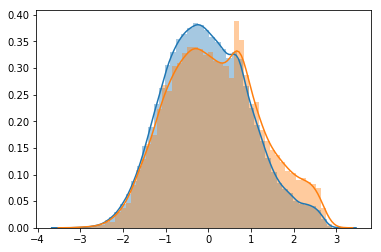

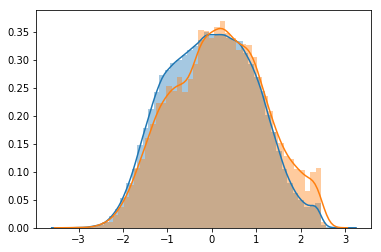

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Just show the first two columns var_0 and var_1
for i in range(2):
    ax1 = sns.distplot(x_train[(y_train==0),i])
    ax2 = sns.distplot(x_train[(y_train==1),i])
    plt.show()

In [222]:
# Helper function for making float values in interval [0,1] binary
def to_binary(x):
    return (0 if x < 0.5 else 1)

#### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

scale_pos_weight  = float(neg/pos)
XGB = XGBClassifier(scale_pos_weight=scale_pos_weight,
                        objective='binary:logistic',
                        random_state= 21,
                        learning_rate = 0.1,
                        n_estimators = 100,
                        tree_depth= 3
                    )
XGB.fit(x_train, y_train)

In [ ]:
y_preds = XGB.predict_proba(x_test)

In [ ]:
probs_pos_XGB  = []
for pred in y_preds:
    probs_pos_XGB.append(pred[1])

In [ ]:
roc_gnb = roc_auc_score(y_test,probs_pos_XGB)
print(roc_gnb)

In [ ]:
def create_submission_file(filename):
    submission = pd.DataFrame(columns = ['ID_code','Target'])
    submission['ID_code']= test['ID_code'] 
    submission['Target'] = sub_combined_preds
    return submission.to_csv(filename,index=False)

#### GNB

In [223]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [224]:
GNB.fit(x_train, y_train)
y_preds_test = GNB.predict_proba(x_test)
print(y_preds_test[:10])

[[0.9976797  0.0023203 ]
 [0.75185677 0.24814323]
 [0.99146547 0.00853453]
 [0.82813963 0.17186037]
 [0.50619194 0.49380806]
 [0.96968532 0.03031468]
 [0.9950827  0.0049173 ]
 [0.95779733 0.04220267]
 [0.99342305 0.00657695]
 [0.99622528 0.00377472]]


In [225]:
from sklearn.metrics import roc_auc_score 

probs_pos_test_gnb  = []
for pred in y_preds_test:
    probs_pos_test_gnb.append(pred[1])
    
roc_test = roc_auc_score(y_test, probs_pos_test_gnb)
print(roc_test)

0.8884259049642617


In [227]:
#x_transformed_test
y_pred = GNB.predict_proba(x_transformed_test)

prediction_GNB = [to_binary(x[0]) for x in y_pred[:, 1:]] #.clip(0, 1)
submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_GNB
submission.to_csv('GNB.csv', index=False)

#### LGB

In [131]:
from lightgbm import LGBMRegressor, LGBMClassifier

# learning_rate': 0.008, n_estimators = 2000, commented out settings 1. --> 0.8836
# learning_rate': 0.05, n_estimators = 2000, commented out settings 2. --> 0.8867
# learning_rate': 0.07, n_estimators = 6000, commented out settings 2. --> 0.8649
# learning_rate': 0.03, n_estimators = 2000, commented out settings 3. --> 0.8768
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. --> 0.8851
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. with gamma dist --> 0.8019
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist --> 0.8929
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist + classifier model --> 0.8930
# learning_rate': 0.05, n_estimators = 2000, commented out settings 6. with binary dist + classifier model --> 0.8585
# learning_rate': 0.02, n_estimators = 4000, commented out settings 7. with binary dist + classifier model --> 0.8950


# 7
LGB_params = {'num_leaves': 255,
         'objective': 'binary',
         'learning_rate': 0.02,
         'metric': 'rmse',
         'max_bin': 120,
         'num_iterations': 4000,
         'boosting': 'gbdt'}

#6
#LGB_params = {'num_leaves': 255,
#         'min_data_in_leaf': 0,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.05,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,
#         'max_bin': 120}

# 5
#LGB_params = {'num_leaves': 255,
#         'objective': 'binary',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 4
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 3
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'dart'}

# 2
#LGB_params = {'num_leaves': 40,
#         'min_data_in_leaf': 50,
#         'objective': 'regression',
#         'max_depth': 9,
#         'learning_rate': 0.07,
#         "boosting": "gbdt",
#         "feature_fraction": 0.7,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.7,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

# 1. LGB_params = {'num_leaves': 50,
#         'min_data_in_leaf': 70,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.008,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

#LGB = LGBMRegressor(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

LGB = LGBMClassifier(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

In [132]:
LGB.fit(x_train, y_train, eval_metric='rmse', verbose=1000)


E:\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting='gbdt', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.02,
        max_bin=120, max_depth=-1, metric='rmse', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, nthread=4, num_iterations=4000, num_leaves=255,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [133]:
y_pred = LGB.predict_proba(x_test) # for classifier
#y_pred = LGB.predict(x_test) # for regression
print(y_pred[:10])
#print(min(y_pred))
#print(max(y_pred))



[[9.99995784e-01 4.21645202e-06]
 [9.78157092e-01 2.18429079e-02]
 [9.99987654e-01 1.23456181e-05]
 [9.88159643e-01 1.18403572e-02]
 [7.01915838e-01 2.98084162e-01]
 [9.99969970e-01 3.00299192e-05]
 [9.99997868e-01 2.13236020e-06]
 [9.99914635e-01 8.53654077e-05]
 [9.99999125e-01 8.74983379e-07]
 [9.99999820e-01 1.79770111e-07]]


In [134]:
#print(y_pred[:, 1:])
roc_test = roc_auc_score(y_test, y_pred[:, 1:].clip(0, 1))
print(roc_test)
# got 0.8846161338721976 with LGBMClassifier and LGB.predict_proba(x_test)

0.8950235523437182


In [228]:
y_pred = LGB.predict_proba(x_transformed_test)

prediction_LGB = [to_binary(x[0]) for x in y_pred[:, 1:]] #.clip(0, 1)
submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_LGB
submission.to_csv('LGB.csv', index=False)

#### LGB Cross validation

In [33]:
LGB_cross = LGBMRegressor(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)


In [34]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(LGB_cross, x, y, cv=3)

In [40]:
roc_test = roc_auc_score(y, y_pred.clip(0, 1))
print(roc_test)

0.8802885989057947


#### CAT

In [195]:
import catboost

# done of param set #1
# learning_rate': 0.03, iter: 400  --> 0.8721
# learning_rate': 0.008, iter: 400  --> 0.8299
# learning_rate': 0.1, iter: 400  --> 0.8867
# learning_rate': 0.07, iter: 800  --> 0.8901
# learning_rate': 0.07, iter: 1600  --> 0.8911

# learning_rate': 0.02, depth:7, iter: 3000  --> 0.8981
# learning_rate': 0.01, depth:7, iter: 5000, od_type='Iter', bootstrap_type='Bernoulli'  --> 0.8965
# learning_rate': 0.02, depth:7, iter: 6000  --> 0.9007

# 1
#CAT_params = {'learning_rate': 0.07,
#              'depth': 9,
#              'l2_leaf_reg': 8,
#              'bootstrap_type': 'Bernoulli',
#              'od_type': 'Iter',
#              'od_wait': 10,
#              'random_seed': 11,
#              'allow_writing_files': False}

#CAT = catboost.CatBoostRegressor(iterations=1600,  eval_metric='RMSE', **CAT_params)

#CAT = catboost.CatBoostClassifier(iterations=300,  eval_metric='RMSE', **CAT_params)
CAT = catboost.CatBoostClassifier(iterations=6000, learning_rate=0.02, depth=7)
# THE BEST CAT = catboost.CatBoostClassifier(iterations=5000, learning_rate=0.01, depth=7, od_type='Iter', bootstrap_type='Bernoulli')


In [196]:
CAT.fit(x_train, y_train, verbose=True)

0:	learn: 0.6756645	total: 241ms	remaining: 24m 5s
1:	learn: 0.6588179	total: 457ms	remaining: 22m 51s
2:	learn: 0.6428838	total: 648ms	remaining: 21m 36s
3:	learn: 0.6275129	total: 858ms	remaining: 21m 26s
4:	learn: 0.6131318	total: 1.05s	remaining: 21m 4s
5:	learn: 0.5990123	total: 1.22s	remaining: 20m 19s
6:	learn: 0.5857830	total: 1.43s	remaining: 20m 25s
7:	learn: 0.5733346	total: 1.65s	remaining: 20m 36s
8:	learn: 0.5611672	total: 1.82s	remaining: 20m 15s
9:	learn: 0.5498097	total: 2.03s	remaining: 20m 14s
10:	learn: 0.5384404	total: 2.23s	remaining: 20m 16s
11:	learn: 0.5282788	total: 2.46s	remaining: 20m 27s
12:	learn: 0.5181647	total: 2.69s	remaining: 20m 40s
13:	learn: 0.5087604	total: 2.89s	remaining: 20m 35s
14:	learn: 0.4996944	total: 3.1s	remaining: 20m 34s
15:	learn: 0.4907746	total: 3.3s	remaining: 20m 34s
16:	learn: 0.4827106	total: 3.48s	remaining: 20m 24s
17:	learn: 0.4751867	total: 3.68s	remaining: 20m 23s
18:	learn: 0.4675388	total: 3.87s	remaining: 20m 18s
19:	lea

156:	learn: 0.2827405	total: 28s	remaining: 17m 22s
157:	learn: 0.2825399	total: 28.2s	remaining: 17m 21s
158:	learn: 0.2823371	total: 28.3s	remaining: 17m 20s
159:	learn: 0.2821217	total: 28.5s	remaining: 17m 18s
160:	learn: 0.2819159	total: 28.6s	remaining: 17m 17s
161:	learn: 0.2817233	total: 28.8s	remaining: 17m 16s
162:	learn: 0.2815213	total: 28.9s	remaining: 17m 16s
163:	learn: 0.2813148	total: 29.1s	remaining: 17m 15s
164:	learn: 0.2811189	total: 29.3s	remaining: 17m 14s
165:	learn: 0.2809200	total: 29.4s	remaining: 17m 14s
166:	learn: 0.2807134	total: 29.6s	remaining: 17m 13s
167:	learn: 0.2805209	total: 29.7s	remaining: 17m 11s
168:	learn: 0.2803225	total: 29.9s	remaining: 17m 11s
169:	learn: 0.2801380	total: 30s	remaining: 17m 10s
170:	learn: 0.2799396	total: 30.2s	remaining: 17m 9s
171:	learn: 0.2797492	total: 30.4s	remaining: 17m 8s
172:	learn: 0.2795521	total: 30.5s	remaining: 17m 7s
173:	learn: 0.2793630	total: 30.7s	remaining: 17m 6s
174:	learn: 0.2791622	total: 30.8s	r

310:	learn: 0.2592991	total: 52.5s	remaining: 15m 59s
311:	learn: 0.2591796	total: 52.6s	remaining: 15m 59s
312:	learn: 0.2590625	total: 52.8s	remaining: 15m 59s
313:	learn: 0.2589478	total: 53s	remaining: 15m 58s
314:	learn: 0.2588261	total: 53.1s	remaining: 15m 58s
315:	learn: 0.2587122	total: 53.3s	remaining: 15m 58s
316:	learn: 0.2585934	total: 53.4s	remaining: 15m 58s
317:	learn: 0.2584729	total: 53.6s	remaining: 15m 58s
318:	learn: 0.2583599	total: 53.8s	remaining: 15m 57s
319:	learn: 0.2582431	total: 53.9s	remaining: 15m 57s
320:	learn: 0.2581313	total: 54.1s	remaining: 15m 56s
321:	learn: 0.2580126	total: 54.2s	remaining: 15m 56s
322:	learn: 0.2578933	total: 54.4s	remaining: 15m 56s
323:	learn: 0.2577693	total: 54.6s	remaining: 15m 56s
324:	learn: 0.2576608	total: 54.7s	remaining: 15m 55s
325:	learn: 0.2575521	total: 54.9s	remaining: 15m 55s
326:	learn: 0.2574366	total: 55.1s	remaining: 15m 55s
327:	learn: 0.2573171	total: 55.3s	remaining: 15m 56s
328:	learn: 0.2571998	total: 5

462:	learn: 0.2442487	total: 1m 17s	remaining: 15m 31s
463:	learn: 0.2441610	total: 1m 18s	remaining: 15m 31s
464:	learn: 0.2440748	total: 1m 18s	remaining: 15m 30s
465:	learn: 0.2439966	total: 1m 18s	remaining: 15m 30s
466:	learn: 0.2439067	total: 1m 18s	remaining: 15m 30s
467:	learn: 0.2438239	total: 1m 18s	remaining: 15m 29s
468:	learn: 0.2437414	total: 1m 18s	remaining: 15m 29s
469:	learn: 0.2436589	total: 1m 18s	remaining: 15m 29s
470:	learn: 0.2435738	total: 1m 19s	remaining: 15m 29s
471:	learn: 0.2434858	total: 1m 19s	remaining: 15m 28s
472:	learn: 0.2433993	total: 1m 19s	remaining: 15m 28s
473:	learn: 0.2433184	total: 1m 19s	remaining: 15m 28s
474:	learn: 0.2432430	total: 1m 19s	remaining: 15m 28s
475:	learn: 0.2431582	total: 1m 19s	remaining: 15m 27s
476:	learn: 0.2430787	total: 1m 20s	remaining: 15m 27s
477:	learn: 0.2429967	total: 1m 20s	remaining: 15m 27s
478:	learn: 0.2429135	total: 1m 20s	remaining: 15m 27s
479:	learn: 0.2428367	total: 1m 20s	remaining: 15m 27s
480:	learn

614:	learn: 0.2331796	total: 1m 42s	remaining: 15m
615:	learn: 0.2331243	total: 1m 42s	remaining: 14m 59s
616:	learn: 0.2330693	total: 1m 43s	remaining: 14m 59s
617:	learn: 0.2330048	total: 1m 43s	remaining: 14m 59s
618:	learn: 0.2329350	total: 1m 43s	remaining: 14m 59s
619:	learn: 0.2328730	total: 1m 43s	remaining: 14m 58s
620:	learn: 0.2327961	total: 1m 43s	remaining: 14m 59s
621:	learn: 0.2327324	total: 1m 43s	remaining: 14m 58s
622:	learn: 0.2326667	total: 1m 44s	remaining: 14m 58s
623:	learn: 0.2326033	total: 1m 44s	remaining: 14m 58s
624:	learn: 0.2325379	total: 1m 44s	remaining: 14m 58s
625:	learn: 0.2324780	total: 1m 44s	remaining: 14m 58s
626:	learn: 0.2324092	total: 1m 44s	remaining: 14m 58s
627:	learn: 0.2323518	total: 1m 45s	remaining: 14m 58s
628:	learn: 0.2322919	total: 1m 45s	remaining: 14m 58s
629:	learn: 0.2322329	total: 1m 45s	remaining: 14m 58s
630:	learn: 0.2321682	total: 1m 45s	remaining: 14m 58s
631:	learn: 0.2320941	total: 1m 45s	remaining: 14m 58s
632:	learn: 0.

766:	learn: 0.2242355	total: 2m 9s	remaining: 14m 40s
767:	learn: 0.2241852	total: 2m 9s	remaining: 14m 40s
768:	learn: 0.2241359	total: 2m 9s	remaining: 14m 39s
769:	learn: 0.2240848	total: 2m 9s	remaining: 14m 39s
770:	learn: 0.2240285	total: 2m 9s	remaining: 14m 39s
771:	learn: 0.2239787	total: 2m 9s	remaining: 14m 39s
772:	learn: 0.2239241	total: 2m 10s	remaining: 14m 39s
773:	learn: 0.2238670	total: 2m 10s	remaining: 14m 39s
774:	learn: 0.2238140	total: 2m 10s	remaining: 14m 39s
775:	learn: 0.2237608	total: 2m 10s	remaining: 14m 39s
776:	learn: 0.2237085	total: 2m 10s	remaining: 14m 39s
777:	learn: 0.2236510	total: 2m 10s	remaining: 14m 39s
778:	learn: 0.2235953	total: 2m 11s	remaining: 14m 38s
779:	learn: 0.2235457	total: 2m 11s	remaining: 14m 38s
780:	learn: 0.2234954	total: 2m 11s	remaining: 14m 38s
781:	learn: 0.2234458	total: 2m 11s	remaining: 14m 38s
782:	learn: 0.2233920	total: 2m 11s	remaining: 14m 38s
783:	learn: 0.2233389	total: 2m 11s	remaining: 14m 37s
784:	learn: 0.22

916:	learn: 0.2168870	total: 2m 34s	remaining: 14m 13s
917:	learn: 0.2168441	total: 2m 34s	remaining: 14m 13s
918:	learn: 0.2167917	total: 2m 34s	remaining: 14m 13s
919:	learn: 0.2167430	total: 2m 34s	remaining: 14m 13s
920:	learn: 0.2166998	total: 2m 34s	remaining: 14m 13s
921:	learn: 0.2166576	total: 2m 34s	remaining: 14m 12s
922:	learn: 0.2166136	total: 2m 35s	remaining: 14m 12s
923:	learn: 0.2165661	total: 2m 35s	remaining: 14m 12s
924:	learn: 0.2165180	total: 2m 35s	remaining: 14m 12s
925:	learn: 0.2164706	total: 2m 35s	remaining: 14m 12s
926:	learn: 0.2164279	total: 2m 35s	remaining: 14m 12s
927:	learn: 0.2163867	total: 2m 35s	remaining: 14m 12s
928:	learn: 0.2163432	total: 2m 36s	remaining: 14m 11s
929:	learn: 0.2162974	total: 2m 36s	remaining: 14m 11s
930:	learn: 0.2162551	total: 2m 36s	remaining: 14m 11s
931:	learn: 0.2162092	total: 2m 36s	remaining: 14m 11s
932:	learn: 0.2161655	total: 2m 36s	remaining: 14m 11s
933:	learn: 0.2161255	total: 2m 36s	remaining: 14m 11s
934:	learn

1066:	learn: 0.2106618	total: 2m 59s	remaining: 13m 47s
1067:	learn: 0.2106265	total: 2m 59s	remaining: 13m 47s
1068:	learn: 0.2105861	total: 2m 59s	remaining: 13m 47s
1069:	learn: 0.2105510	total: 2m 59s	remaining: 13m 47s
1070:	learn: 0.2105119	total: 2m 59s	remaining: 13m 47s
1071:	learn: 0.2104826	total: 2m 59s	remaining: 13m 46s
1072:	learn: 0.2104497	total: 3m	remaining: 13m 46s
1073:	learn: 0.2104102	total: 3m	remaining: 13m 46s
1074:	learn: 0.2103726	total: 3m	remaining: 13m 46s
1075:	learn: 0.2103360	total: 3m	remaining: 13m 46s
1076:	learn: 0.2102961	total: 3m	remaining: 13m 46s
1077:	learn: 0.2102568	total: 3m	remaining: 13m 45s
1078:	learn: 0.2102198	total: 3m 1s	remaining: 13m 45s
1079:	learn: 0.2101773	total: 3m 1s	remaining: 13m 45s
1080:	learn: 0.2101378	total: 3m 1s	remaining: 13m 45s
1081:	learn: 0.2100988	total: 3m 1s	remaining: 13m 45s
1082:	learn: 0.2100626	total: 3m 1s	remaining: 13m 45s
1083:	learn: 0.2100281	total: 3m 1s	remaining: 13m 44s
1084:	learn: 0.2099946

1215:	learn: 0.2053343	total: 3m 24s	remaining: 13m 23s
1216:	learn: 0.2052951	total: 3m 24s	remaining: 13m 23s
1217:	learn: 0.2052612	total: 3m 24s	remaining: 13m 23s
1218:	learn: 0.2052247	total: 3m 24s	remaining: 13m 23s
1219:	learn: 0.2051938	total: 3m 25s	remaining: 13m 23s
1220:	learn: 0.2051566	total: 3m 25s	remaining: 13m 23s
1221:	learn: 0.2051181	total: 3m 25s	remaining: 13m 23s
1222:	learn: 0.2050906	total: 3m 25s	remaining: 13m 23s
1223:	learn: 0.2050604	total: 3m 25s	remaining: 13m 22s
1224:	learn: 0.2050242	total: 3m 25s	remaining: 13m 22s
1225:	learn: 0.2049907	total: 3m 26s	remaining: 13m 22s
1226:	learn: 0.2049567	total: 3m 26s	remaining: 13m 22s
1227:	learn: 0.2049268	total: 3m 26s	remaining: 13m 22s
1228:	learn: 0.2048963	total: 3m 26s	remaining: 13m 22s
1229:	learn: 0.2048664	total: 3m 26s	remaining: 13m 22s
1230:	learn: 0.2048349	total: 3m 27s	remaining: 13m 22s
1231:	learn: 0.2047948	total: 3m 27s	remaining: 13m 21s
1232:	learn: 0.2047623	total: 3m 27s	remaining: 

1363:	learn: 0.2006404	total: 3m 50s	remaining: 13m 3s
1364:	learn: 0.2006112	total: 3m 50s	remaining: 13m 3s
1365:	learn: 0.2005809	total: 3m 50s	remaining: 13m 2s
1366:	learn: 0.2005491	total: 3m 50s	remaining: 13m 2s
1367:	learn: 0.2005233	total: 3m 51s	remaining: 13m 2s
1368:	learn: 0.2004899	total: 3m 51s	remaining: 13m 2s
1369:	learn: 0.2004612	total: 3m 51s	remaining: 13m 2s
1370:	learn: 0.2004294	total: 3m 51s	remaining: 13m 2s
1371:	learn: 0.2003968	total: 3m 51s	remaining: 13m 1s
1372:	learn: 0.2003703	total: 3m 51s	remaining: 13m 1s
1373:	learn: 0.2003391	total: 3m 52s	remaining: 13m 1s
1374:	learn: 0.2003081	total: 3m 52s	remaining: 13m 1s
1375:	learn: 0.2002775	total: 3m 52s	remaining: 13m 1s
1376:	learn: 0.2002468	total: 3m 52s	remaining: 13m 1s
1377:	learn: 0.2002161	total: 3m 52s	remaining: 13m 1s
1378:	learn: 0.2001801	total: 3m 53s	remaining: 13m
1379:	learn: 0.2001485	total: 3m 53s	remaining: 13m
1380:	learn: 0.2001184	total: 3m 53s	remaining: 13m
1381:	learn: 0.2000

1513:	learn: 0.1963246	total: 4m 16s	remaining: 12m 39s
1514:	learn: 0.1962968	total: 4m 16s	remaining: 12m 39s
1515:	learn: 0.1962713	total: 4m 16s	remaining: 12m 38s
1516:	learn: 0.1962430	total: 4m 16s	remaining: 12m 38s
1517:	learn: 0.1962124	total: 4m 16s	remaining: 12m 38s
1518:	learn: 0.1961865	total: 4m 17s	remaining: 12m 38s
1519:	learn: 0.1961584	total: 4m 17s	remaining: 12m 38s
1520:	learn: 0.1961291	total: 4m 17s	remaining: 12m 38s
1521:	learn: 0.1960959	total: 4m 17s	remaining: 12m 38s
1522:	learn: 0.1960730	total: 4m 17s	remaining: 12m 37s
1523:	learn: 0.1960451	total: 4m 17s	remaining: 12m 37s
1524:	learn: 0.1960181	total: 4m 18s	remaining: 12m 37s
1525:	learn: 0.1959927	total: 4m 18s	remaining: 12m 37s
1526:	learn: 0.1959613	total: 4m 18s	remaining: 12m 37s
1527:	learn: 0.1959372	total: 4m 18s	remaining: 12m 37s
1528:	learn: 0.1959101	total: 4m 18s	remaining: 12m 36s
1529:	learn: 0.1958803	total: 4m 19s	remaining: 12m 36s
1530:	learn: 0.1958488	total: 4m 19s	remaining: 

1660:	learn: 0.1924449	total: 4m 41s	remaining: 12m 14s
1661:	learn: 0.1924185	total: 4m 41s	remaining: 12m 14s
1662:	learn: 0.1923945	total: 4m 41s	remaining: 12m 14s
1663:	learn: 0.1923689	total: 4m 41s	remaining: 12m 13s
1664:	learn: 0.1923440	total: 4m 41s	remaining: 12m 13s
1665:	learn: 0.1923170	total: 4m 42s	remaining: 12m 13s
1666:	learn: 0.1922893	total: 4m 42s	remaining: 12m 13s
1667:	learn: 0.1922653	total: 4m 42s	remaining: 12m 13s
1668:	learn: 0.1922408	total: 4m 42s	remaining: 12m 13s
1669:	learn: 0.1922155	total: 4m 42s	remaining: 12m 13s
1670:	learn: 0.1921902	total: 4m 42s	remaining: 12m 12s
1671:	learn: 0.1921616	total: 4m 43s	remaining: 12m 12s
1672:	learn: 0.1921346	total: 4m 43s	remaining: 12m 12s
1673:	learn: 0.1921097	total: 4m 43s	remaining: 12m 12s
1674:	learn: 0.1920911	total: 4m 43s	remaining: 12m 12s
1675:	learn: 0.1920651	total: 4m 43s	remaining: 12m 12s
1676:	learn: 0.1920360	total: 4m 43s	remaining: 12m 11s
1677:	learn: 0.1920132	total: 4m 44s	remaining: 

1810:	learn: 0.1888538	total: 5m 7s	remaining: 11m 50s
1811:	learn: 0.1888325	total: 5m 7s	remaining: 11m 50s
1812:	learn: 0.1888140	total: 5m 7s	remaining: 11m 50s
1813:	learn: 0.1887904	total: 5m 7s	remaining: 11m 50s
1814:	learn: 0.1887607	total: 5m 7s	remaining: 11m 49s
1815:	learn: 0.1887374	total: 5m 8s	remaining: 11m 49s
1816:	learn: 0.1887147	total: 5m 8s	remaining: 11m 49s
1817:	learn: 0.1886882	total: 5m 8s	remaining: 11m 49s
1818:	learn: 0.1886612	total: 5m 8s	remaining: 11m 49s
1819:	learn: 0.1886398	total: 5m 8s	remaining: 11m 49s
1820:	learn: 0.1886215	total: 5m 8s	remaining: 11m 48s
1821:	learn: 0.1886039	total: 5m 9s	remaining: 11m 48s
1822:	learn: 0.1885802	total: 5m 9s	remaining: 11m 48s
1823:	learn: 0.1885593	total: 5m 9s	remaining: 11m 48s
1824:	learn: 0.1885350	total: 5m 9s	remaining: 11m 48s
1825:	learn: 0.1885099	total: 5m 9s	remaining: 11m 48s
1826:	learn: 0.1884854	total: 5m 9s	remaining: 11m 47s
1827:	learn: 0.1884613	total: 5m 10s	remaining: 11m 47s
1828:	lea

1958:	learn: 0.1855492	total: 5m 32s	remaining: 11m 25s
1959:	learn: 0.1855339	total: 5m 32s	remaining: 11m 24s
1960:	learn: 0.1855117	total: 5m 32s	remaining: 11m 24s
1961:	learn: 0.1854890	total: 5m 32s	remaining: 11m 24s
1962:	learn: 0.1854697	total: 5m 32s	remaining: 11m 24s
1963:	learn: 0.1854469	total: 5m 32s	remaining: 11m 24s
1964:	learn: 0.1854256	total: 5m 33s	remaining: 11m 23s
1965:	learn: 0.1854038	total: 5m 33s	remaining: 11m 23s
1966:	learn: 0.1853785	total: 5m 33s	remaining: 11m 23s
1967:	learn: 0.1853570	total: 5m 33s	remaining: 11m 23s
1968:	learn: 0.1853369	total: 5m 33s	remaining: 11m 23s
1969:	learn: 0.1853114	total: 5m 33s	remaining: 11m 23s
1970:	learn: 0.1852851	total: 5m 34s	remaining: 11m 22s
1971:	learn: 0.1852671	total: 5m 34s	remaining: 11m 22s
1972:	learn: 0.1852442	total: 5m 34s	remaining: 11m 22s
1973:	learn: 0.1852243	total: 5m 34s	remaining: 11m 22s
1974:	learn: 0.1852005	total: 5m 34s	remaining: 11m 22s
1975:	learn: 0.1851795	total: 5m 34s	remaining: 

2106:	learn: 0.1824509	total: 5m 57s	remaining: 11m 1s
2107:	learn: 0.1824305	total: 5m 57s	remaining: 11m
2108:	learn: 0.1824093	total: 5m 58s	remaining: 11m
2109:	learn: 0.1823863	total: 5m 58s	remaining: 11m
2110:	learn: 0.1823650	total: 5m 58s	remaining: 11m
2111:	learn: 0.1823447	total: 5m 58s	remaining: 11m
2112:	learn: 0.1823268	total: 5m 58s	remaining: 11m
2113:	learn: 0.1823007	total: 5m 58s	remaining: 10m 59s
2114:	learn: 0.1822833	total: 5m 59s	remaining: 10m 59s
2115:	learn: 0.1822639	total: 5m 59s	remaining: 10m 59s
2116:	learn: 0.1822456	total: 5m 59s	remaining: 10m 59s
2117:	learn: 0.1822276	total: 5m 59s	remaining: 10m 59s
2118:	learn: 0.1822088	total: 5m 59s	remaining: 10m 59s
2119:	learn: 0.1821873	total: 5m 59s	remaining: 10m 58s
2120:	learn: 0.1821659	total: 6m	remaining: 10m 58s
2121:	learn: 0.1821516	total: 6m	remaining: 10m 58s
2122:	learn: 0.1821311	total: 6m	remaining: 10m 58s
2123:	learn: 0.1821120	total: 6m	remaining: 10m 58s
2124:	learn: 0.1820905	total: 6m	

2256:	learn: 0.1795664	total: 6m 22s	remaining: 10m 35s
2257:	learn: 0.1795531	total: 6m 23s	remaining: 10m 34s
2258:	learn: 0.1795359	total: 6m 23s	remaining: 10m 34s
2259:	learn: 0.1795139	total: 6m 23s	remaining: 10m 34s
2260:	learn: 0.1794948	total: 6m 23s	remaining: 10m 34s
2261:	learn: 0.1794757	total: 6m 23s	remaining: 10m 34s
2262:	learn: 0.1794582	total: 6m 23s	remaining: 10m 34s
2263:	learn: 0.1794375	total: 6m 24s	remaining: 10m 33s
2264:	learn: 0.1794181	total: 6m 24s	remaining: 10m 33s
2265:	learn: 0.1793990	total: 6m 24s	remaining: 10m 33s
2266:	learn: 0.1793798	total: 6m 24s	remaining: 10m 33s
2267:	learn: 0.1793658	total: 6m 24s	remaining: 10m 33s
2268:	learn: 0.1793530	total: 6m 24s	remaining: 10m 32s
2269:	learn: 0.1793338	total: 6m 25s	remaining: 10m 32s
2270:	learn: 0.1793119	total: 6m 25s	remaining: 10m 32s
2271:	learn: 0.1792971	total: 6m 25s	remaining: 10m 32s
2272:	learn: 0.1792797	total: 6m 25s	remaining: 10m 32s
2273:	learn: 0.1792622	total: 6m 25s	remaining: 

2404:	learn: 0.1768739	total: 6m 47s	remaining: 10m 9s
2405:	learn: 0.1768494	total: 6m 47s	remaining: 10m 9s
2406:	learn: 0.1768276	total: 6m 47s	remaining: 10m 8s
2407:	learn: 0.1768102	total: 6m 48s	remaining: 10m 8s
2408:	learn: 0.1767948	total: 6m 48s	remaining: 10m 8s
2409:	learn: 0.1767766	total: 6m 48s	remaining: 10m 8s
2410:	learn: 0.1767588	total: 6m 48s	remaining: 10m 8s
2411:	learn: 0.1767458	total: 6m 48s	remaining: 10m 8s
2412:	learn: 0.1767251	total: 6m 48s	remaining: 10m 7s
2413:	learn: 0.1767106	total: 6m 49s	remaining: 10m 7s
2414:	learn: 0.1766944	total: 6m 49s	remaining: 10m 7s
2415:	learn: 0.1766775	total: 6m 49s	remaining: 10m 7s
2416:	learn: 0.1766556	total: 6m 49s	remaining: 10m 7s
2417:	learn: 0.1766386	total: 6m 49s	remaining: 10m 7s
2418:	learn: 0.1766230	total: 6m 49s	remaining: 10m 6s
2419:	learn: 0.1766073	total: 6m 50s	remaining: 10m 6s
2420:	learn: 0.1765888	total: 6m 50s	remaining: 10m 6s
2421:	learn: 0.1765726	total: 6m 50s	remaining: 10m 6s
2422:	lear

2555:	learn: 0.1741947	total: 7m 12s	remaining: 9m 43s
2556:	learn: 0.1741774	total: 7m 13s	remaining: 9m 43s
2557:	learn: 0.1741635	total: 7m 13s	remaining: 9m 42s
2558:	learn: 0.1741453	total: 7m 13s	remaining: 9m 42s
2559:	learn: 0.1741274	total: 7m 13s	remaining: 9m 42s
2560:	learn: 0.1741104	total: 7m 13s	remaining: 9m 42s
2561:	learn: 0.1740993	total: 7m 13s	remaining: 9m 42s
2562:	learn: 0.1740819	total: 7m 14s	remaining: 9m 42s
2563:	learn: 0.1740643	total: 7m 14s	remaining: 9m 41s
2564:	learn: 0.1740511	total: 7m 14s	remaining: 9m 41s
2565:	learn: 0.1740327	total: 7m 14s	remaining: 9m 41s
2566:	learn: 0.1740171	total: 7m 14s	remaining: 9m 41s
2567:	learn: 0.1740031	total: 7m 14s	remaining: 9m 41s
2568:	learn: 0.1739838	total: 7m 15s	remaining: 9m 41s
2569:	learn: 0.1739655	total: 7m 15s	remaining: 9m 40s
2570:	learn: 0.1739489	total: 7m 15s	remaining: 9m 40s
2571:	learn: 0.1739314	total: 7m 15s	remaining: 9m 40s
2572:	learn: 0.1739145	total: 7m 15s	remaining: 9m 40s
2573:	lear

2704:	learn: 0.1717318	total: 7m 38s	remaining: 9m 18s
2705:	learn: 0.1717189	total: 7m 38s	remaining: 9m 18s
2706:	learn: 0.1717006	total: 7m 38s	remaining: 9m 17s
2707:	learn: 0.1716827	total: 7m 38s	remaining: 9m 17s
2708:	learn: 0.1716649	total: 7m 39s	remaining: 9m 17s
2709:	learn: 0.1716445	total: 7m 39s	remaining: 9m 17s
2710:	learn: 0.1716265	total: 7m 39s	remaining: 9m 17s
2711:	learn: 0.1716114	total: 7m 39s	remaining: 9m 17s
2712:	learn: 0.1715932	total: 7m 39s	remaining: 9m 16s
2713:	learn: 0.1715790	total: 7m 39s	remaining: 9m 16s
2714:	learn: 0.1715589	total: 7m 40s	remaining: 9m 16s
2715:	learn: 0.1715436	total: 7m 40s	remaining: 9m 16s
2716:	learn: 0.1715228	total: 7m 40s	remaining: 9m 16s
2717:	learn: 0.1715022	total: 7m 40s	remaining: 9m 16s
2718:	learn: 0.1714855	total: 7m 40s	remaining: 9m 15s
2719:	learn: 0.1714701	total: 7m 40s	remaining: 9m 15s
2720:	learn: 0.1714525	total: 7m 41s	remaining: 9m 15s
2721:	learn: 0.1714363	total: 7m 41s	remaining: 9m 15s
2722:	lear

2857:	learn: 0.1692963	total: 8m 3s	remaining: 8m 51s
2858:	learn: 0.1692816	total: 8m 3s	remaining: 8m 51s
2859:	learn: 0.1692646	total: 8m 4s	remaining: 8m 51s
2860:	learn: 0.1692477	total: 8m 4s	remaining: 8m 51s
2861:	learn: 0.1692313	total: 8m 4s	remaining: 8m 51s
2862:	learn: 0.1692152	total: 8m 4s	remaining: 8m 51s
2863:	learn: 0.1691947	total: 8m 4s	remaining: 8m 50s
2864:	learn: 0.1691807	total: 8m 5s	remaining: 8m 50s
2865:	learn: 0.1691663	total: 8m 5s	remaining: 8m 50s
2866:	learn: 0.1691468	total: 8m 5s	remaining: 8m 50s
2867:	learn: 0.1691345	total: 8m 5s	remaining: 8m 50s
2868:	learn: 0.1691154	total: 8m 5s	remaining: 8m 50s
2869:	learn: 0.1690981	total: 8m 5s	remaining: 8m 49s
2870:	learn: 0.1690804	total: 8m 6s	remaining: 8m 49s
2871:	learn: 0.1690633	total: 8m 6s	remaining: 8m 49s
2872:	learn: 0.1690475	total: 8m 6s	remaining: 8m 49s
2873:	learn: 0.1690317	total: 8m 6s	remaining: 8m 49s
2874:	learn: 0.1690113	total: 8m 6s	remaining: 8m 48s
2875:	learn: 0.1690023	total

3008:	learn: 0.1670019	total: 8m 28s	remaining: 8m 25s
3009:	learn: 0.1669870	total: 8m 29s	remaining: 8m 25s
3010:	learn: 0.1669729	total: 8m 29s	remaining: 8m 25s
3011:	learn: 0.1669585	total: 8m 29s	remaining: 8m 25s
3012:	learn: 0.1669400	total: 8m 29s	remaining: 8m 25s
3013:	learn: 0.1669268	total: 8m 29s	remaining: 8m 24s
3014:	learn: 0.1669084	total: 8m 29s	remaining: 8m 24s
3015:	learn: 0.1668945	total: 8m 30s	remaining: 8m 24s
3016:	learn: 0.1668789	total: 8m 30s	remaining: 8m 24s
3017:	learn: 0.1668656	total: 8m 30s	remaining: 8m 24s
3018:	learn: 0.1668505	total: 8m 30s	remaining: 8m 24s
3019:	learn: 0.1668345	total: 8m 30s	remaining: 8m 23s
3020:	learn: 0.1668200	total: 8m 30s	remaining: 8m 23s
3021:	learn: 0.1668033	total: 8m 31s	remaining: 8m 23s
3022:	learn: 0.1667837	total: 8m 31s	remaining: 8m 23s
3023:	learn: 0.1667696	total: 8m 31s	remaining: 8m 23s
3024:	learn: 0.1667586	total: 8m 31s	remaining: 8m 23s
3025:	learn: 0.1667418	total: 8m 31s	remaining: 8m 23s
3026:	lear

3159:	learn: 0.1647412	total: 8m 54s	remaining: 8m
3160:	learn: 0.1647258	total: 8m 54s	remaining: 8m
3161:	learn: 0.1647121	total: 8m 54s	remaining: 8m
3162:	learn: 0.1646950	total: 8m 55s	remaining: 8m
3163:	learn: 0.1646819	total: 8m 55s	remaining: 7m 59s
3164:	learn: 0.1646678	total: 8m 55s	remaining: 7m 59s
3165:	learn: 0.1646542	total: 8m 55s	remaining: 7m 59s
3166:	learn: 0.1646419	total: 8m 55s	remaining: 7m 59s
3167:	learn: 0.1646253	total: 8m 56s	remaining: 7m 59s
3168:	learn: 0.1646102	total: 8m 56s	remaining: 7m 59s
3169:	learn: 0.1645909	total: 8m 56s	remaining: 7m 58s
3170:	learn: 0.1645735	total: 8m 56s	remaining: 7m 58s
3171:	learn: 0.1645550	total: 8m 56s	remaining: 7m 58s
3172:	learn: 0.1645423	total: 8m 56s	remaining: 7m 58s
3173:	learn: 0.1645301	total: 8m 57s	remaining: 7m 58s
3174:	learn: 0.1645171	total: 8m 57s	remaining: 7m 58s
3175:	learn: 0.1645040	total: 8m 57s	remaining: 7m 57s
3176:	learn: 0.1644906	total: 8m 57s	remaining: 7m 57s
3177:	learn: 0.1644783	tot

3311:	learn: 0.1625363	total: 9m 20s	remaining: 7m 34s
3312:	learn: 0.1625219	total: 9m 20s	remaining: 7m 34s
3313:	learn: 0.1625089	total: 9m 20s	remaining: 7m 34s
3314:	learn: 0.1624977	total: 9m 20s	remaining: 7m 34s
3315:	learn: 0.1624847	total: 9m 20s	remaining: 7m 34s
3316:	learn: 0.1624731	total: 9m 21s	remaining: 7m 33s
3317:	learn: 0.1624602	total: 9m 21s	remaining: 7m 33s
3318:	learn: 0.1624423	total: 9m 21s	remaining: 7m 33s
3319:	learn: 0.1624312	total: 9m 21s	remaining: 7m 33s
3320:	learn: 0.1624173	total: 9m 21s	remaining: 7m 33s
3321:	learn: 0.1624035	total: 9m 21s	remaining: 7m 33s
3322:	learn: 0.1623890	total: 9m 22s	remaining: 7m 32s
3323:	learn: 0.1623783	total: 9m 22s	remaining: 7m 32s
3324:	learn: 0.1623640	total: 9m 22s	remaining: 7m 32s
3325:	learn: 0.1623523	total: 9m 22s	remaining: 7m 32s
3326:	learn: 0.1623393	total: 9m 22s	remaining: 7m 32s
3327:	learn: 0.1623285	total: 9m 22s	remaining: 7m 32s
3328:	learn: 0.1623123	total: 9m 23s	remaining: 7m 31s
3329:	lear

3462:	learn: 0.1605202	total: 9m 45s	remaining: 7m 8s
3463:	learn: 0.1605054	total: 9m 45s	remaining: 7m 8s
3464:	learn: 0.1604932	total: 9m 45s	remaining: 7m 8s
3465:	learn: 0.1604774	total: 9m 45s	remaining: 7m 8s
3466:	learn: 0.1604648	total: 9m 45s	remaining: 7m 7s
3467:	learn: 0.1604525	total: 9m 45s	remaining: 7m 7s
3468:	learn: 0.1604406	total: 9m 46s	remaining: 7m 7s
3469:	learn: 0.1604289	total: 9m 46s	remaining: 7m 7s
3470:	learn: 0.1604102	total: 9m 46s	remaining: 7m 7s
3471:	learn: 0.1603984	total: 9m 46s	remaining: 7m 7s
3472:	learn: 0.1603898	total: 9m 46s	remaining: 7m 6s
3473:	learn: 0.1603736	total: 9m 46s	remaining: 7m 6s
3474:	learn: 0.1603619	total: 9m 47s	remaining: 7m 6s
3475:	learn: 0.1603491	total: 9m 47s	remaining: 7m 6s
3476:	learn: 0.1603388	total: 9m 47s	remaining: 7m 6s
3477:	learn: 0.1603255	total: 9m 47s	remaining: 7m 6s
3478:	learn: 0.1603155	total: 9m 47s	remaining: 7m 5s
3479:	learn: 0.1603001	total: 9m 47s	remaining: 7m 5s
3480:	learn: 0.1602882	total

3614:	learn: 0.1584901	total: 10m 10s	remaining: 6m 42s
3615:	learn: 0.1584783	total: 10m 10s	remaining: 6m 42s
3616:	learn: 0.1584636	total: 10m 10s	remaining: 6m 42s
3617:	learn: 0.1584517	total: 10m 10s	remaining: 6m 42s
3618:	learn: 0.1584352	total: 10m 10s	remaining: 6m 41s
3619:	learn: 0.1584236	total: 10m 10s	remaining: 6m 41s
3620:	learn: 0.1584088	total: 10m 11s	remaining: 6m 41s
3621:	learn: 0.1583934	total: 10m 11s	remaining: 6m 41s
3622:	learn: 0.1583787	total: 10m 11s	remaining: 6m 41s
3623:	learn: 0.1583655	total: 10m 11s	remaining: 6m 41s
3624:	learn: 0.1583517	total: 10m 11s	remaining: 6m 40s
3625:	learn: 0.1583375	total: 10m 12s	remaining: 6m 40s
3626:	learn: 0.1583198	total: 10m 12s	remaining: 6m 40s
3627:	learn: 0.1583069	total: 10m 12s	remaining: 6m 40s
3628:	learn: 0.1582929	total: 10m 12s	remaining: 6m 40s
3629:	learn: 0.1582794	total: 10m 12s	remaining: 6m 40s
3630:	learn: 0.1582617	total: 10m 12s	remaining: 6m 39s
3631:	learn: 0.1582490	total: 10m 13s	remaining:

3761:	learn: 0.1565655	total: 10m 34s	remaining: 6m 17s
3762:	learn: 0.1565515	total: 10m 34s	remaining: 6m 17s
3763:	learn: 0.1565407	total: 10m 35s	remaining: 6m 17s
3764:	learn: 0.1565286	total: 10m 35s	remaining: 6m 17s
3765:	learn: 0.1565108	total: 10m 35s	remaining: 6m 16s
3766:	learn: 0.1564984	total: 10m 35s	remaining: 6m 16s
3767:	learn: 0.1564878	total: 10m 35s	remaining: 6m 16s
3768:	learn: 0.1564749	total: 10m 35s	remaining: 6m 16s
3769:	learn: 0.1564619	total: 10m 36s	remaining: 6m 16s
3770:	learn: 0.1564527	total: 10m 36s	remaining: 6m 16s
3771:	learn: 0.1564410	total: 10m 36s	remaining: 6m 15s
3772:	learn: 0.1564259	total: 10m 36s	remaining: 6m 15s
3773:	learn: 0.1564132	total: 10m 36s	remaining: 6m 15s
3774:	learn: 0.1563995	total: 10m 36s	remaining: 6m 15s
3775:	learn: 0.1563884	total: 10m 37s	remaining: 6m 15s
3776:	learn: 0.1563708	total: 10m 37s	remaining: 6m 15s
3777:	learn: 0.1563602	total: 10m 37s	remaining: 6m 14s
3778:	learn: 0.1563479	total: 10m 37s	remaining:

3910:	learn: 0.1547277	total: 10m 59s	remaining: 5m 51s
3911:	learn: 0.1547124	total: 10m 59s	remaining: 5m 51s
3912:	learn: 0.1546944	total: 10m 59s	remaining: 5m 51s
3913:	learn: 0.1546813	total: 10m 59s	remaining: 5m 51s
3914:	learn: 0.1546695	total: 10m 59s	remaining: 5m 51s
3915:	learn: 0.1546598	total: 10m 59s	remaining: 5m 51s
3916:	learn: 0.1546464	total: 11m	remaining: 5m 51s
3917:	learn: 0.1546311	total: 11m	remaining: 5m 50s
3918:	learn: 0.1546190	total: 11m	remaining: 5m 50s
3919:	learn: 0.1546028	total: 11m	remaining: 5m 50s
3920:	learn: 0.1545890	total: 11m	remaining: 5m 50s
3921:	learn: 0.1545752	total: 11m	remaining: 5m 50s
3922:	learn: 0.1545594	total: 11m 1s	remaining: 5m 50s
3923:	learn: 0.1545461	total: 11m 1s	remaining: 5m 49s
3924:	learn: 0.1545308	total: 11m 1s	remaining: 5m 49s
3925:	learn: 0.1545188	total: 11m 1s	remaining: 5m 49s
3926:	learn: 0.1545054	total: 11m 1s	remaining: 5m 49s
3927:	learn: 0.1544900	total: 11m 2s	remaining: 5m 49s
3928:	learn: 0.1544803

4058:	learn: 0.1529103	total: 11m 23s	remaining: 5m 27s
4059:	learn: 0.1528968	total: 11m 24s	remaining: 5m 26s
4060:	learn: 0.1528843	total: 11m 24s	remaining: 5m 26s
4061:	learn: 0.1528734	total: 11m 24s	remaining: 5m 26s
4062:	learn: 0.1528607	total: 11m 24s	remaining: 5m 26s
4063:	learn: 0.1528537	total: 11m 24s	remaining: 5m 26s
4064:	learn: 0.1528410	total: 11m 24s	remaining: 5m 26s
4065:	learn: 0.1528261	total: 11m 25s	remaining: 5m 25s
4066:	learn: 0.1528092	total: 11m 25s	remaining: 5m 25s
4067:	learn: 0.1527974	total: 11m 25s	remaining: 5m 25s
4068:	learn: 0.1527865	total: 11m 25s	remaining: 5m 25s
4069:	learn: 0.1527743	total: 11m 25s	remaining: 5m 25s
4070:	learn: 0.1527641	total: 11m 25s	remaining: 5m 25s
4071:	learn: 0.1527542	total: 11m 26s	remaining: 5m 24s
4072:	learn: 0.1527430	total: 11m 26s	remaining: 5m 24s
4073:	learn: 0.1527296	total: 11m 26s	remaining: 5m 24s
4074:	learn: 0.1527218	total: 11m 26s	remaining: 5m 24s
4075:	learn: 0.1527102	total: 11m 26s	remaining:

4207:	learn: 0.1511800	total: 11m 48s	remaining: 5m 1s
4208:	learn: 0.1511642	total: 11m 48s	remaining: 5m 1s
4209:	learn: 0.1511482	total: 11m 48s	remaining: 5m 1s
4210:	learn: 0.1511357	total: 11m 48s	remaining: 5m 1s
4211:	learn: 0.1511241	total: 11m 48s	remaining: 5m
4212:	learn: 0.1511124	total: 11m 49s	remaining: 5m
4213:	learn: 0.1510993	total: 11m 49s	remaining: 5m
4214:	learn: 0.1510850	total: 11m 49s	remaining: 5m
4215:	learn: 0.1510749	total: 11m 49s	remaining: 5m
4216:	learn: 0.1510638	total: 11m 49s	remaining: 5m
4217:	learn: 0.1510484	total: 11m 49s	remaining: 4m 59s
4218:	learn: 0.1510387	total: 11m 50s	remaining: 4m 59s
4219:	learn: 0.1510303	total: 11m 50s	remaining: 4m 59s
4220:	learn: 0.1510222	total: 11m 50s	remaining: 4m 59s
4221:	learn: 0.1510128	total: 11m 50s	remaining: 4m 59s
4222:	learn: 0.1509981	total: 11m 50s	remaining: 4m 59s
4223:	learn: 0.1509897	total: 11m 50s	remaining: 4m 58s
4224:	learn: 0.1509780	total: 11m 51s	remaining: 4m 58s
4225:	learn: 0.15096

4357:	learn: 0.1494508	total: 12m 12s	remaining: 4m 36s
4358:	learn: 0.1494419	total: 12m 12s	remaining: 4m 35s
4359:	learn: 0.1494297	total: 12m 13s	remaining: 4m 35s
4360:	learn: 0.1494160	total: 12m 13s	remaining: 4m 35s
4361:	learn: 0.1494079	total: 12m 13s	remaining: 4m 35s
4362:	learn: 0.1493996	total: 12m 13s	remaining: 4m 35s
4363:	learn: 0.1493873	total: 12m 13s	remaining: 4m 35s
4364:	learn: 0.1493783	total: 12m 13s	remaining: 4m 34s
4365:	learn: 0.1493656	total: 12m 14s	remaining: 4m 34s
4366:	learn: 0.1493581	total: 12m 14s	remaining: 4m 34s
4367:	learn: 0.1493480	total: 12m 14s	remaining: 4m 34s
4368:	learn: 0.1493355	total: 12m 14s	remaining: 4m 34s
4369:	learn: 0.1493237	total: 12m 14s	remaining: 4m 34s
4370:	learn: 0.1493108	total: 12m 14s	remaining: 4m 33s
4371:	learn: 0.1492984	total: 12m 15s	remaining: 4m 33s
4372:	learn: 0.1492862	total: 12m 15s	remaining: 4m 33s
4373:	learn: 0.1492762	total: 12m 15s	remaining: 4m 33s
4374:	learn: 0.1492651	total: 12m 15s	remaining:

4504:	learn: 0.1477381	total: 12m 36s	remaining: 4m 11s
4505:	learn: 0.1477235	total: 12m 37s	remaining: 4m 10s
4506:	learn: 0.1477098	total: 12m 37s	remaining: 4m 10s
4507:	learn: 0.1477004	total: 12m 37s	remaining: 4m 10s
4508:	learn: 0.1476856	total: 12m 37s	remaining: 4m 10s
4509:	learn: 0.1476716	total: 12m 37s	remaining: 4m 10s
4510:	learn: 0.1476609	total: 12m 37s	remaining: 4m 10s
4511:	learn: 0.1476450	total: 12m 38s	remaining: 4m 10s
4512:	learn: 0.1476336	total: 12m 38s	remaining: 4m 9s
4513:	learn: 0.1476173	total: 12m 38s	remaining: 4m 9s
4514:	learn: 0.1476067	total: 12m 38s	remaining: 4m 9s
4515:	learn: 0.1475957	total: 12m 38s	remaining: 4m 9s
4516:	learn: 0.1475859	total: 12m 38s	remaining: 4m 9s
4517:	learn: 0.1475748	total: 12m 39s	remaining: 4m 8s
4518:	learn: 0.1475627	total: 12m 39s	remaining: 4m 8s
4519:	learn: 0.1475500	total: 12m 39s	remaining: 4m 8s
4520:	learn: 0.1475394	total: 12m 39s	remaining: 4m 8s
4521:	learn: 0.1475254	total: 12m 39s	remaining: 4m 8s
45

4654:	learn: 0.1460494	total: 13m 1s	remaining: 3m 45s
4655:	learn: 0.1460392	total: 13m 1s	remaining: 3m 45s
4656:	learn: 0.1460259	total: 13m 1s	remaining: 3m 45s
4657:	learn: 0.1460114	total: 13m 1s	remaining: 3m 45s
4658:	learn: 0.1459988	total: 13m 2s	remaining: 3m 45s
4659:	learn: 0.1459882	total: 13m 2s	remaining: 3m 44s
4660:	learn: 0.1459791	total: 13m 2s	remaining: 3m 44s
4661:	learn: 0.1459720	total: 13m 2s	remaining: 3m 44s
4662:	learn: 0.1459608	total: 13m 2s	remaining: 3m 44s
4663:	learn: 0.1459452	total: 13m 2s	remaining: 3m 44s
4664:	learn: 0.1459311	total: 13m 3s	remaining: 3m 44s
4665:	learn: 0.1459186	total: 13m 3s	remaining: 3m 43s
4666:	learn: 0.1459054	total: 13m 3s	remaining: 3m 43s
4667:	learn: 0.1458951	total: 13m 3s	remaining: 3m 43s
4668:	learn: 0.1458835	total: 13m 3s	remaining: 3m 43s
4669:	learn: 0.1458748	total: 13m 3s	remaining: 3m 43s
4670:	learn: 0.1458611	total: 13m 4s	remaining: 3m 43s
4671:	learn: 0.1458499	total: 13m 4s	remaining: 3m 42s
4672:	lear

4802:	learn: 0.1444494	total: 13m 25s	remaining: 3m 20s
4803:	learn: 0.1444350	total: 13m 25s	remaining: 3m 20s
4804:	learn: 0.1444271	total: 13m 25s	remaining: 3m 20s
4805:	learn: 0.1444172	total: 13m 25s	remaining: 3m 20s
4806:	learn: 0.1444079	total: 13m 26s	remaining: 3m 20s
4807:	learn: 0.1444012	total: 13m 26s	remaining: 3m 19s
4808:	learn: 0.1443900	total: 13m 26s	remaining: 3m 19s
4809:	learn: 0.1443803	total: 13m 26s	remaining: 3m 19s
4810:	learn: 0.1443705	total: 13m 26s	remaining: 3m 19s
4811:	learn: 0.1443627	total: 13m 26s	remaining: 3m 19s
4812:	learn: 0.1443525	total: 13m 27s	remaining: 3m 19s
4813:	learn: 0.1443478	total: 13m 27s	remaining: 3m 18s
4814:	learn: 0.1443362	total: 13m 27s	remaining: 3m 18s
4815:	learn: 0.1443282	total: 13m 27s	remaining: 3m 18s
4816:	learn: 0.1443159	total: 13m 27s	remaining: 3m 18s
4817:	learn: 0.1443049	total: 13m 27s	remaining: 3m 18s
4818:	learn: 0.1442972	total: 13m 28s	remaining: 3m 18s
4819:	learn: 0.1442859	total: 13m 28s	remaining:

4951:	learn: 0.1429163	total: 13m 49s	remaining: 2m 55s
4952:	learn: 0.1429034	total: 13m 49s	remaining: 2m 55s
4953:	learn: 0.1428924	total: 13m 49s	remaining: 2m 55s
4954:	learn: 0.1428821	total: 13m 49s	remaining: 2m 54s
4955:	learn: 0.1428684	total: 13m 49s	remaining: 2m 54s
4956:	learn: 0.1428609	total: 13m 49s	remaining: 2m 54s
4957:	learn: 0.1428469	total: 13m 50s	remaining: 2m 54s
4958:	learn: 0.1428348	total: 13m 50s	remaining: 2m 54s
4959:	learn: 0.1428226	total: 13m 50s	remaining: 2m 54s
4960:	learn: 0.1428131	total: 13m 50s	remaining: 2m 53s
4961:	learn: 0.1428044	total: 13m 50s	remaining: 2m 53s
4962:	learn: 0.1427938	total: 13m 50s	remaining: 2m 53s
4963:	learn: 0.1427801	total: 13m 51s	remaining: 2m 53s
4964:	learn: 0.1427671	total: 13m 51s	remaining: 2m 53s
4965:	learn: 0.1427560	total: 13m 51s	remaining: 2m 53s
4966:	learn: 0.1427480	total: 13m 51s	remaining: 2m 52s
4967:	learn: 0.1427380	total: 13m 51s	remaining: 2m 52s
4968:	learn: 0.1427290	total: 13m 51s	remaining:

5099:	learn: 0.1413591	total: 14m 13s	remaining: 2m 30s
5100:	learn: 0.1413488	total: 14m 13s	remaining: 2m 30s
5101:	learn: 0.1413375	total: 14m 13s	remaining: 2m 30s
5102:	learn: 0.1413262	total: 14m 13s	remaining: 2m 30s
5103:	learn: 0.1413131	total: 14m 13s	remaining: 2m 29s
5104:	learn: 0.1413002	total: 14m 13s	remaining: 2m 29s
5105:	learn: 0.1412897	total: 14m 14s	remaining: 2m 29s
5106:	learn: 0.1412822	total: 14m 14s	remaining: 2m 29s
5107:	learn: 0.1412738	total: 14m 14s	remaining: 2m 29s
5108:	learn: 0.1412624	total: 14m 14s	remaining: 2m 29s
5109:	learn: 0.1412550	total: 14m 14s	remaining: 2m 28s
5110:	learn: 0.1412430	total: 14m 14s	remaining: 2m 28s
5111:	learn: 0.1412328	total: 14m 14s	remaining: 2m 28s
5112:	learn: 0.1412224	total: 14m 15s	remaining: 2m 28s
5113:	learn: 0.1412083	total: 14m 15s	remaining: 2m 28s
5114:	learn: 0.1411985	total: 14m 15s	remaining: 2m 28s
5115:	learn: 0.1411874	total: 14m 15s	remaining: 2m 27s
5116:	learn: 0.1411728	total: 14m 15s	remaining:

5247:	learn: 0.1398398	total: 14m 37s	remaining: 2m 5s
5248:	learn: 0.1398288	total: 14m 37s	remaining: 2m 5s
5249:	learn: 0.1398179	total: 14m 38s	remaining: 2m 5s
5250:	learn: 0.1398079	total: 14m 38s	remaining: 2m 5s
5251:	learn: 0.1397979	total: 14m 38s	remaining: 2m 5s
5252:	learn: 0.1397880	total: 14m 38s	remaining: 2m 4s
5253:	learn: 0.1397783	total: 14m 38s	remaining: 2m 4s
5254:	learn: 0.1397686	total: 14m 38s	remaining: 2m 4s
5255:	learn: 0.1397613	total: 14m 39s	remaining: 2m 4s
5256:	learn: 0.1397512	total: 14m 39s	remaining: 2m 4s
5257:	learn: 0.1397421	total: 14m 39s	remaining: 2m 4s
5258:	learn: 0.1397316	total: 14m 39s	remaining: 2m 3s
5259:	learn: 0.1397262	total: 14m 39s	remaining: 2m 3s
5260:	learn: 0.1397162	total: 14m 39s	remaining: 2m 3s
5261:	learn: 0.1397078	total: 14m 40s	remaining: 2m 3s
5262:	learn: 0.1396973	total: 14m 40s	remaining: 2m 3s
5263:	learn: 0.1396843	total: 14m 40s	remaining: 2m 3s
5264:	learn: 0.1396728	total: 14m 40s	remaining: 2m 2s
5265:	lear

5396:	learn: 0.1384158	total: 15m 1s	remaining: 1m 40s
5397:	learn: 0.1384040	total: 15m 1s	remaining: 1m 40s
5398:	learn: 0.1383961	total: 15m 1s	remaining: 1m 40s
5399:	learn: 0.1383842	total: 15m 2s	remaining: 1m 40s
5400:	learn: 0.1383777	total: 15m 2s	remaining: 1m 40s
5401:	learn: 0.1383704	total: 15m 2s	remaining: 1m 39s
5402:	learn: 0.1383596	total: 15m 2s	remaining: 1m 39s
5403:	learn: 0.1383501	total: 15m 2s	remaining: 1m 39s
5404:	learn: 0.1383426	total: 15m 2s	remaining: 1m 39s
5405:	learn: 0.1383326	total: 15m 3s	remaining: 1m 39s
5406:	learn: 0.1383218	total: 15m 3s	remaining: 1m 39s
5407:	learn: 0.1383138	total: 15m 3s	remaining: 1m 38s
5408:	learn: 0.1383017	total: 15m 3s	remaining: 1m 38s
5409:	learn: 0.1382903	total: 15m 3s	remaining: 1m 38s
5410:	learn: 0.1382794	total: 15m 3s	remaining: 1m 38s
5411:	learn: 0.1382712	total: 15m 4s	remaining: 1m 38s
5412:	learn: 0.1382576	total: 15m 4s	remaining: 1m 38s
5413:	learn: 0.1382504	total: 15m 4s	remaining: 1m 37s
5414:	lear

5545:	learn: 0.1369370	total: 15m 26s	remaining: 1m 15s
5546:	learn: 0.1369270	total: 15m 26s	remaining: 1m 15s
5547:	learn: 0.1369151	total: 15m 26s	remaining: 1m 15s
5548:	learn: 0.1369047	total: 15m 26s	remaining: 1m 15s
5549:	learn: 0.1368977	total: 15m 27s	remaining: 1m 15s
5550:	learn: 0.1368861	total: 15m 27s	remaining: 1m 14s
5551:	learn: 0.1368763	total: 15m 27s	remaining: 1m 14s
5552:	learn: 0.1368659	total: 15m 27s	remaining: 1m 14s
5553:	learn: 0.1368555	total: 15m 27s	remaining: 1m 14s
5554:	learn: 0.1368435	total: 15m 27s	remaining: 1m 14s
5555:	learn: 0.1368304	total: 15m 28s	remaining: 1m 14s
5556:	learn: 0.1368222	total: 15m 28s	remaining: 1m 13s
5557:	learn: 0.1368128	total: 15m 28s	remaining: 1m 13s
5558:	learn: 0.1368003	total: 15m 28s	remaining: 1m 13s
5559:	learn: 0.1367882	total: 15m 28s	remaining: 1m 13s
5560:	learn: 0.1367769	total: 15m 28s	remaining: 1m 13s
5561:	learn: 0.1367686	total: 15m 29s	remaining: 1m 13s
5562:	learn: 0.1367603	total: 15m 29s	remaining:

5694:	learn: 0.1354582	total: 15m 51s	remaining: 50.9s
5695:	learn: 0.1354490	total: 15m 51s	remaining: 50.8s
5696:	learn: 0.1354370	total: 15m 51s	remaining: 50.6s
5697:	learn: 0.1354231	total: 15m 51s	remaining: 50.4s
5698:	learn: 0.1354125	total: 15m 51s	remaining: 50.3s
5699:	learn: 0.1354020	total: 15m 51s	remaining: 50.1s
5700:	learn: 0.1353941	total: 15m 52s	remaining: 49.9s
5701:	learn: 0.1353816	total: 15m 52s	remaining: 49.8s
5702:	learn: 0.1353692	total: 15m 52s	remaining: 49.6s
5703:	learn: 0.1353603	total: 15m 52s	remaining: 49.4s
5704:	learn: 0.1353524	total: 15m 52s	remaining: 49.3s
5705:	learn: 0.1353446	total: 15m 52s	remaining: 49.1s
5706:	learn: 0.1353324	total: 15m 53s	remaining: 48.9s
5707:	learn: 0.1353226	total: 15m 53s	remaining: 48.8s
5708:	learn: 0.1353175	total: 15m 53s	remaining: 48.6s
5709:	learn: 0.1353078	total: 15m 53s	remaining: 48.4s
5710:	learn: 0.1352981	total: 15m 53s	remaining: 48.3s
5711:	learn: 0.1352910	total: 15m 53s	remaining: 48.1s
5712:	lear

5846:	learn: 0.1339681	total: 16m 16s	remaining: 25.5s
5847:	learn: 0.1339587	total: 16m 16s	remaining: 25.4s
5848:	learn: 0.1339516	total: 16m 16s	remaining: 25.2s
5849:	learn: 0.1339450	total: 16m 16s	remaining: 25s
5850:	learn: 0.1339383	total: 16m 16s	remaining: 24.9s
5851:	learn: 0.1339315	total: 16m 17s	remaining: 24.7s
5852:	learn: 0.1339209	total: 16m 17s	remaining: 24.5s
5853:	learn: 0.1339136	total: 16m 17s	remaining: 24.4s
5854:	learn: 0.1339033	total: 16m 17s	remaining: 24.2s
5855:	learn: 0.1338927	total: 16m 17s	remaining: 24s
5856:	learn: 0.1338820	total: 16m 17s	remaining: 23.9s
5857:	learn: 0.1338718	total: 16m 18s	remaining: 23.7s
5858:	learn: 0.1338632	total: 16m 18s	remaining: 23.5s
5859:	learn: 0.1338548	total: 16m 18s	remaining: 23.4s
5860:	learn: 0.1338435	total: 16m 18s	remaining: 23.2s
5861:	learn: 0.1338334	total: 16m 18s	remaining: 23s
5862:	learn: 0.1338236	total: 16m 18s	remaining: 22.9s
5863:	learn: 0.1338167	total: 16m 19s	remaining: 22.7s
5864:	learn: 0.1

5996:	learn: 0.1325759	total: 16m 40s	remaining: 501ms
5997:	learn: 0.1325683	total: 16m 41s	remaining: 334ms
5998:	learn: 0.1325616	total: 16m 41s	remaining: 167ms
5999:	learn: 0.1325520	total: 16m 41s	remaining: 0us


In [197]:
#y_pred = CAT.predict(x_test) # for regression
y_pred = CAT.predict_proba(x_test) # for classifier
#y_pred = LGB.predict(x_test) # for regression
print(y_pred[:10])

[[0.99339847 0.00660153]
 [0.84710439 0.15289561]
 [0.98344727 0.01655273]
 [0.9019129  0.0980871 ]
 [0.47215824 0.52784176]
 [0.96661732 0.03338268]
 [0.99282656 0.00717344]
 [0.97370502 0.02629498]
 [0.99343941 0.00656059]
 [0.99661709 0.00338291]]


In [198]:
roc_test = roc_auc_score(y_test, y_pred[:, 1:].clip(0, 1))
print(roc_test)

0.9007793883991515


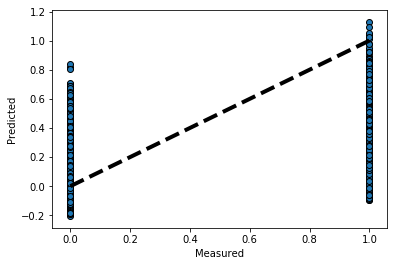

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [220]:
#x_transformed_test
y_pred = CAT.predict_proba(x_transformed_test)

prediction_CAT = [to_binary(x[0]) for x in y_pred[:, 1:].clip(0, 1)]
submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_CAT
submission.to_csv('CAT.csv', index=False)

In [221]:
print(sum(prediction_CAT))

6299


#### CAT Cross validation

In [73]:
CAT_cross = catboost.CatBoostRegressor(iterations=1600,  eval_metric='RMSE', **CAT_params)

In [74]:
y_pred = cross_val_predict(CAT_cross, x, y, cv=3)

0:	learn: 0.3141834	total: 348ms	remaining: 9m 16s
1:	learn: 0.3118596	total: 673ms	remaining: 8m 57s
2:	learn: 0.3096466	total: 965ms	remaining: 8m 33s
3:	learn: 0.3076636	total: 1.3s	remaining: 8m 37s
4:	learn: 0.3058999	total: 1.61s	remaining: 8m 35s
5:	learn: 0.3043187	total: 1.92s	remaining: 8m 29s
6:	learn: 0.3028962	total: 2.24s	remaining: 8m 28s
7:	learn: 0.3015371	total: 2.56s	remaining: 8m 29s
8:	learn: 0.3003294	total: 2.87s	remaining: 8m 27s
9:	learn: 0.2992583	total: 3.21s	remaining: 8m 29s
10:	learn: 0.2981887	total: 3.51s	remaining: 8m 26s
11:	learn: 0.2971906	total: 3.83s	remaining: 8m 26s
12:	learn: 0.2962468	total: 4.12s	remaining: 8m 23s
13:	learn: 0.2953677	total: 4.45s	remaining: 8m 23s
14:	learn: 0.2945354	total: 4.74s	remaining: 8m 20s
15:	learn: 0.2938310	total: 5.08s	remaining: 8m 22s
16:	learn: 0.2931132	total: 5.38s	remaining: 8m 20s
17:	learn: 0.2924698	total: 5.68s	remaining: 8m 19s
18:	learn: 0.2918569	total: 5.98s	remaining: 8m 17s
19:	learn: 0.2912450	to

158:	learn: 0.2598443	total: 50.1s	remaining: 7m 33s
159:	learn: 0.2597217	total: 50.4s	remaining: 7m 33s
160:	learn: 0.2595865	total: 50.7s	remaining: 7m 32s
161:	learn: 0.2594712	total: 51s	remaining: 7m 32s
162:	learn: 0.2593413	total: 51.3s	remaining: 7m 31s
163:	learn: 0.2592147	total: 51.6s	remaining: 7m 31s
164:	learn: 0.2590841	total: 51.9s	remaining: 7m 31s
165:	learn: 0.2589765	total: 52.2s	remaining: 7m 30s
166:	learn: 0.2588605	total: 52.5s	remaining: 7m 30s
167:	learn: 0.2587290	total: 52.8s	remaining: 7m 29s
168:	learn: 0.2585904	total: 53.1s	remaining: 7m 29s
169:	learn: 0.2584563	total: 53.4s	remaining: 7m 29s
170:	learn: 0.2583336	total: 53.7s	remaining: 7m 28s
171:	learn: 0.2582079	total: 54s	remaining: 7m 28s
172:	learn: 0.2580767	total: 54.3s	remaining: 7m 27s
173:	learn: 0.2579319	total: 54.6s	remaining: 7m 27s
174:	learn: 0.2578026	total: 54.9s	remaining: 7m 27s
175:	learn: 0.2576891	total: 55.2s	remaining: 7m 26s
176:	learn: 0.2575663	total: 55.5s	remaining: 7m 2

313:	learn: 0.2434989	total: 1m 38s	remaining: 6m 45s
314:	learn: 0.2434117	total: 1m 39s	remaining: 6m 44s
315:	learn: 0.2433247	total: 1m 39s	remaining: 6m 44s
316:	learn: 0.2432319	total: 1m 39s	remaining: 6m 44s
317:	learn: 0.2431634	total: 1m 40s	remaining: 6m 43s
318:	learn: 0.2430709	total: 1m 40s	remaining: 6m 43s
319:	learn: 0.2429992	total: 1m 40s	remaining: 6m 43s
320:	learn: 0.2429191	total: 1m 41s	remaining: 6m 42s
321:	learn: 0.2428388	total: 1m 41s	remaining: 6m 42s
322:	learn: 0.2427677	total: 1m 41s	remaining: 6m 41s
323:	learn: 0.2426924	total: 1m 41s	remaining: 6m 41s
324:	learn: 0.2426070	total: 1m 42s	remaining: 6m 41s
325:	learn: 0.2425214	total: 1m 42s	remaining: 6m 40s
326:	learn: 0.2424482	total: 1m 42s	remaining: 6m 40s
327:	learn: 0.2423697	total: 1m 43s	remaining: 6m 40s
328:	learn: 0.2422971	total: 1m 43s	remaining: 6m 39s
329:	learn: 0.2422220	total: 1m 43s	remaining: 6m 39s
330:	learn: 0.2421317	total: 1m 44s	remaining: 6m 39s
331:	learn: 0.2420554	total:

466:	learn: 0.2322352	total: 2m 31s	remaining: 6m 6s
467:	learn: 0.2321827	total: 2m 31s	remaining: 6m 6s
468:	learn: 0.2321231	total: 2m 31s	remaining: 6m 5s
469:	learn: 0.2320428	total: 2m 32s	remaining: 6m 5s
470:	learn: 0.2319688	total: 2m 32s	remaining: 6m 5s
471:	learn: 0.2318811	total: 2m 32s	remaining: 6m 4s
472:	learn: 0.2318086	total: 2m 33s	remaining: 6m 4s
473:	learn: 0.2317447	total: 2m 33s	remaining: 6m 4s
474:	learn: 0.2316842	total: 2m 33s	remaining: 6m 3s
475:	learn: 0.2316251	total: 2m 33s	remaining: 6m 3s
476:	learn: 0.2315684	total: 2m 34s	remaining: 6m 3s
477:	learn: 0.2314832	total: 2m 34s	remaining: 6m 3s
478:	learn: 0.2314134	total: 2m 35s	remaining: 6m 2s
479:	learn: 0.2313623	total: 2m 35s	remaining: 6m 2s
480:	learn: 0.2312830	total: 2m 35s	remaining: 6m 2s
481:	learn: 0.2312267	total: 2m 35s	remaining: 6m 1s
482:	learn: 0.2311661	total: 2m 36s	remaining: 6m 1s
483:	learn: 0.2311072	total: 2m 36s	remaining: 6m 1s
484:	learn: 0.2310515	total: 2m 36s	remaining:

620:	learn: 0.2224147	total: 3m 22s	remaining: 5m 19s
621:	learn: 0.2223358	total: 3m 23s	remaining: 5m 19s
622:	learn: 0.2222780	total: 3m 23s	remaining: 5m 18s
623:	learn: 0.2222230	total: 3m 23s	remaining: 5m 18s
624:	learn: 0.2221556	total: 3m 24s	remaining: 5m 18s
625:	learn: 0.2221028	total: 3m 24s	remaining: 5m 17s
626:	learn: 0.2220491	total: 3m 24s	remaining: 5m 17s
627:	learn: 0.2219956	total: 3m 25s	remaining: 5m 17s
628:	learn: 0.2219303	total: 3m 25s	remaining: 5m 17s
629:	learn: 0.2218693	total: 3m 25s	remaining: 5m 16s
630:	learn: 0.2218152	total: 3m 25s	remaining: 5m 16s
631:	learn: 0.2217502	total: 3m 26s	remaining: 5m 16s
632:	learn: 0.2217068	total: 3m 26s	remaining: 5m 15s
633:	learn: 0.2216562	total: 3m 26s	remaining: 5m 15s
634:	learn: 0.2215873	total: 3m 27s	remaining: 5m 14s
635:	learn: 0.2215298	total: 3m 27s	remaining: 5m 14s
636:	learn: 0.2214723	total: 3m 27s	remaining: 5m 14s
637:	learn: 0.2214313	total: 3m 28s	remaining: 5m 13s
638:	learn: 0.2213771	total:

774:	learn: 0.2140041	total: 4m 15s	remaining: 4m 32s
775:	learn: 0.2139585	total: 4m 15s	remaining: 4m 31s
776:	learn: 0.2139122	total: 4m 16s	remaining: 4m 31s
777:	learn: 0.2138584	total: 4m 16s	remaining: 4m 31s
778:	learn: 0.2138068	total: 4m 16s	remaining: 4m 30s
779:	learn: 0.2137576	total: 4m 17s	remaining: 4m 30s
780:	learn: 0.2137134	total: 4m 17s	remaining: 4m 30s
781:	learn: 0.2136626	total: 4m 17s	remaining: 4m 29s
782:	learn: 0.2136174	total: 4m 18s	remaining: 4m 29s
783:	learn: 0.2135456	total: 4m 18s	remaining: 4m 29s
784:	learn: 0.2134941	total: 4m 18s	remaining: 4m 28s
785:	learn: 0.2134307	total: 4m 19s	remaining: 4m 28s
786:	learn: 0.2133775	total: 4m 19s	remaining: 4m 28s
787:	learn: 0.2133272	total: 4m 19s	remaining: 4m 27s
788:	learn: 0.2132835	total: 4m 20s	remaining: 4m 27s
789:	learn: 0.2132462	total: 4m 20s	remaining: 4m 27s
790:	learn: 0.2131993	total: 4m 20s	remaining: 4m 26s
791:	learn: 0.2131491	total: 4m 21s	remaining: 4m 26s
792:	learn: 0.2130916	total:

928:	learn: 0.2063196	total: 5m 8s	remaining: 3m 43s
929:	learn: 0.2062729	total: 5m 9s	remaining: 3m 42s
930:	learn: 0.2062374	total: 5m 9s	remaining: 3m 42s
931:	learn: 0.2061901	total: 5m 9s	remaining: 3m 41s
932:	learn: 0.2061400	total: 5m 10s	remaining: 3m 41s
933:	learn: 0.2060909	total: 5m 10s	remaining: 3m 41s
934:	learn: 0.2060458	total: 5m 10s	remaining: 3m 40s
935:	learn: 0.2059935	total: 5m 11s	remaining: 3m 40s
936:	learn: 0.2059489	total: 5m 11s	remaining: 3m 40s
937:	learn: 0.2058944	total: 5m 11s	remaining: 3m 40s
938:	learn: 0.2058325	total: 5m 12s	remaining: 3m 39s
939:	learn: 0.2057928	total: 5m 12s	remaining: 3m 39s
940:	learn: 0.2057450	total: 5m 12s	remaining: 3m 39s
941:	learn: 0.2056931	total: 5m 13s	remaining: 3m 38s
942:	learn: 0.2056470	total: 5m 13s	remaining: 3m 38s
943:	learn: 0.2055922	total: 5m 14s	remaining: 3m 38s
944:	learn: 0.2055510	total: 5m 14s	remaining: 3m 37s
945:	learn: 0.2054965	total: 5m 14s	remaining: 3m 37s
946:	learn: 0.2054600	total: 5m 

1080:	learn: 0.1992599	total: 5m 58s	remaining: 2m 51s
1081:	learn: 0.1992204	total: 5m 58s	remaining: 2m 51s
1082:	learn: 0.1991818	total: 5m 58s	remaining: 2m 51s
1083:	learn: 0.1991396	total: 5m 59s	remaining: 2m 50s
1084:	learn: 0.1990954	total: 5m 59s	remaining: 2m 50s
1085:	learn: 0.1990614	total: 5m 59s	remaining: 2m 50s
1086:	learn: 0.1990209	total: 5m 59s	remaining: 2m 49s
1087:	learn: 0.1989705	total: 6m	remaining: 2m 49s
1088:	learn: 0.1989214	total: 6m	remaining: 2m 49s
1089:	learn: 0.1988783	total: 6m	remaining: 2m 48s
1090:	learn: 0.1988376	total: 6m 1s	remaining: 2m 48s
1091:	learn: 0.1988037	total: 6m 1s	remaining: 2m 48s
1092:	learn: 0.1987531	total: 6m 1s	remaining: 2m 47s
1093:	learn: 0.1986896	total: 6m 2s	remaining: 2m 47s
1094:	learn: 0.1986556	total: 6m 2s	remaining: 2m 47s
1095:	learn: 0.1986106	total: 6m 2s	remaining: 2m 46s
1096:	learn: 0.1985663	total: 6m 3s	remaining: 2m 46s
1097:	learn: 0.1985319	total: 6m 3s	remaining: 2m 46s
1098:	learn: 0.1984843	total: 

1231:	learn: 0.1928924	total: 6m 47s	remaining: 2m 1s
1232:	learn: 0.1928501	total: 6m 48s	remaining: 2m 1s
1233:	learn: 0.1928051	total: 6m 48s	remaining: 2m 1s
1234:	learn: 0.1927706	total: 6m 48s	remaining: 2m
1235:	learn: 0.1927250	total: 6m 49s	remaining: 2m
1236:	learn: 0.1926880	total: 6m 49s	remaining: 2m
1237:	learn: 0.1926442	total: 6m 49s	remaining: 1m 59s
1238:	learn: 0.1925916	total: 6m 50s	remaining: 1m 59s
1239:	learn: 0.1925443	total: 6m 50s	remaining: 1m 59s
1240:	learn: 0.1924868	total: 6m 50s	remaining: 1m 58s
1241:	learn: 0.1924397	total: 6m 51s	remaining: 1m 58s
1242:	learn: 0.1923933	total: 6m 51s	remaining: 1m 58s
1243:	learn: 0.1923668	total: 6m 51s	remaining: 1m 57s
1244:	learn: 0.1923143	total: 6m 52s	remaining: 1m 57s
1245:	learn: 0.1922762	total: 6m 52s	remaining: 1m 57s
1246:	learn: 0.1922275	total: 6m 52s	remaining: 1m 56s
1247:	learn: 0.1921902	total: 6m 53s	remaining: 1m 56s
1248:	learn: 0.1921576	total: 6m 53s	remaining: 1m 56s
1249:	learn: 0.1921049	to

1381:	learn: 0.1867346	total: 7m 37s	remaining: 1m 12s
1382:	learn: 0.1866975	total: 7m 37s	remaining: 1m 11s
1383:	learn: 0.1866582	total: 7m 37s	remaining: 1m 11s
1384:	learn: 0.1866053	total: 7m 37s	remaining: 1m 11s
1385:	learn: 0.1865791	total: 7m 38s	remaining: 1m 10s
1386:	learn: 0.1865435	total: 7m 38s	remaining: 1m 10s
1387:	learn: 0.1865199	total: 7m 38s	remaining: 1m 10s
1388:	learn: 0.1864829	total: 7m 39s	remaining: 1m 9s
1389:	learn: 0.1864455	total: 7m 39s	remaining: 1m 9s
1390:	learn: 0.1864145	total: 7m 39s	remaining: 1m 9s
1391:	learn: 0.1863678	total: 7m 40s	remaining: 1m 8s
1392:	learn: 0.1863212	total: 7m 40s	remaining: 1m 8s
1393:	learn: 0.1862726	total: 7m 40s	remaining: 1m 8s
1394:	learn: 0.1862378	total: 7m 41s	remaining: 1m 7s
1395:	learn: 0.1862162	total: 7m 41s	remaining: 1m 7s
1396:	learn: 0.1861625	total: 7m 41s	remaining: 1m 7s
1397:	learn: 0.1861265	total: 7m 42s	remaining: 1m 6s
1398:	learn: 0.1861040	total: 7m 42s	remaining: 1m 6s
1399:	learn: 0.186078

1534:	learn: 0.1806784	total: 8m 29s	remaining: 21.6s
1535:	learn: 0.1806282	total: 8m 29s	remaining: 21.2s
1536:	learn: 0.1805965	total: 8m 29s	remaining: 20.9s
1537:	learn: 0.1805514	total: 8m 30s	remaining: 20.6s
1538:	learn: 0.1805212	total: 8m 30s	remaining: 20.2s
1539:	learn: 0.1805033	total: 8m 30s	remaining: 19.9s
1540:	learn: 0.1804777	total: 8m 31s	remaining: 19.6s
1541:	learn: 0.1804432	total: 8m 31s	remaining: 19.2s
1542:	learn: 0.1803952	total: 8m 31s	remaining: 18.9s
1543:	learn: 0.1803664	total: 8m 32s	remaining: 18.6s
1544:	learn: 0.1803295	total: 8m 32s	remaining: 18.2s
1545:	learn: 0.1802946	total: 8m 32s	remaining: 17.9s
1546:	learn: 0.1802562	total: 8m 33s	remaining: 17.6s
1547:	learn: 0.1802123	total: 8m 33s	remaining: 17.2s
1548:	learn: 0.1801607	total: 8m 33s	remaining: 16.9s
1549:	learn: 0.1801086	total: 8m 34s	remaining: 16.6s
1550:	learn: 0.1800802	total: 8m 34s	remaining: 16.3s
1551:	learn: 0.1800277	total: 8m 34s	remaining: 15.9s
1552:	learn: 0.1799857	total

90:	learn: 0.2709348	total: 29.9s	remaining: 8m 15s
91:	learn: 0.2707381	total: 30.2s	remaining: 8m 14s
92:	learn: 0.2705570	total: 30.5s	remaining: 8m 13s
93:	learn: 0.2703722	total: 30.8s	remaining: 8m 13s
94:	learn: 0.2701823	total: 31.1s	remaining: 8m 12s
95:	learn: 0.2700023	total: 31.4s	remaining: 8m 12s
96:	learn: 0.2698028	total: 31.8s	remaining: 8m 12s
97:	learn: 0.2696071	total: 32.1s	remaining: 8m 12s
98:	learn: 0.2694669	total: 32.4s	remaining: 8m 11s
99:	learn: 0.2692906	total: 32.7s	remaining: 8m 10s
100:	learn: 0.2691099	total: 33s	remaining: 8m 9s
101:	learn: 0.2689371	total: 33.3s	remaining: 8m 9s
102:	learn: 0.2687774	total: 33.7s	remaining: 8m 9s
103:	learn: 0.2686182	total: 34s	remaining: 8m 9s
104:	learn: 0.2684586	total: 34.3s	remaining: 8m 8s
105:	learn: 0.2683018	total: 34.6s	remaining: 8m 8s
106:	learn: 0.2681288	total: 34.9s	remaining: 8m 7s
107:	learn: 0.2679686	total: 35.2s	remaining: 8m 6s
108:	learn: 0.2678038	total: 35.6s	remaining: 8m 6s
109:	learn: 0.26

246:	learn: 0.2505926	total: 1m 18s	remaining: 7m 12s
247:	learn: 0.2504807	total: 1m 19s	remaining: 7m 12s
248:	learn: 0.2503776	total: 1m 19s	remaining: 7m 11s
249:	learn: 0.2502876	total: 1m 19s	remaining: 7m 11s
250:	learn: 0.2501830	total: 1m 20s	remaining: 7m 10s
251:	learn: 0.2500899	total: 1m 20s	remaining: 7m 10s
252:	learn: 0.2499756	total: 1m 20s	remaining: 7m 10s
253:	learn: 0.2498745	total: 1m 21s	remaining: 7m 10s
254:	learn: 0.2497828	total: 1m 21s	remaining: 7m 9s
255:	learn: 0.2496905	total: 1m 21s	remaining: 7m 9s
256:	learn: 0.2495924	total: 1m 22s	remaining: 7m 9s
257:	learn: 0.2494852	total: 1m 22s	remaining: 7m 8s
258:	learn: 0.2493872	total: 1m 22s	remaining: 7m 8s
259:	learn: 0.2492857	total: 1m 23s	remaining: 7m 8s
260:	learn: 0.2491971	total: 1m 23s	remaining: 7m 7s
261:	learn: 0.2490990	total: 1m 23s	remaining: 7m 7s
262:	learn: 0.2490061	total: 1m 24s	remaining: 7m 7s
263:	learn: 0.2489141	total: 1m 24s	remaining: 7m 6s
264:	learn: 0.2488223	total: 1m 24s	re

400:	learn: 0.2375730	total: 2m 9s	remaining: 6m 27s
401:	learn: 0.2374994	total: 2m 10s	remaining: 6m 27s
402:	learn: 0.2374276	total: 2m 10s	remaining: 6m 27s
403:	learn: 0.2373452	total: 2m 10s	remaining: 6m 27s
404:	learn: 0.2372774	total: 2m 11s	remaining: 6m 27s
405:	learn: 0.2372161	total: 2m 11s	remaining: 6m 26s
406:	learn: 0.2371507	total: 2m 11s	remaining: 6m 26s
407:	learn: 0.2370859	total: 2m 12s	remaining: 6m 26s
408:	learn: 0.2370131	total: 2m 12s	remaining: 6m 26s
409:	learn: 0.2369470	total: 2m 12s	remaining: 6m 25s
410:	learn: 0.2368739	total: 2m 13s	remaining: 6m 25s
411:	learn: 0.2368185	total: 2m 13s	remaining: 6m 25s
412:	learn: 0.2367440	total: 2m 13s	remaining: 6m 24s
413:	learn: 0.2366746	total: 2m 14s	remaining: 6m 24s
414:	learn: 0.2366119	total: 2m 14s	remaining: 6m 24s
415:	learn: 0.2365488	total: 2m 14s	remaining: 6m 24s
416:	learn: 0.2364860	total: 2m 15s	remaining: 6m 23s
417:	learn: 0.2364186	total: 2m 15s	remaining: 6m 23s
418:	learn: 0.2363500	total: 

553:	learn: 0.2276101	total: 3m	remaining: 5m 39s
554:	learn: 0.2275565	total: 3m	remaining: 5m 39s
555:	learn: 0.2274871	total: 3m	remaining: 5m 39s
556:	learn: 0.2274334	total: 3m 1s	remaining: 5m 38s
557:	learn: 0.2273967	total: 3m 1s	remaining: 5m 38s
558:	learn: 0.2273381	total: 3m 1s	remaining: 5m 38s
559:	learn: 0.2272681	total: 3m 1s	remaining: 5m 37s
560:	learn: 0.2271926	total: 3m 2s	remaining: 5m 37s
561:	learn: 0.2271332	total: 3m 2s	remaining: 5m 37s
562:	learn: 0.2270770	total: 3m 2s	remaining: 5m 36s
563:	learn: 0.2270285	total: 3m 3s	remaining: 5m 36s
564:	learn: 0.2269517	total: 3m 3s	remaining: 5m 36s
565:	learn: 0.2268881	total: 3m 3s	remaining: 5m 36s
566:	learn: 0.2268399	total: 3m 4s	remaining: 5m 35s
567:	learn: 0.2267788	total: 3m 4s	remaining: 5m 35s
568:	learn: 0.2267276	total: 3m 4s	remaining: 5m 35s
569:	learn: 0.2266612	total: 3m 5s	remaining: 5m 34s
570:	learn: 0.2266007	total: 3m 5s	remaining: 5m 34s
571:	learn: 0.2265396	total: 3m 5s	remaining: 5m 34s
57

707:	learn: 0.2188635	total: 3m 49s	remaining: 4m 48s
708:	learn: 0.2188037	total: 3m 49s	remaining: 4m 48s
709:	learn: 0.2187427	total: 3m 49s	remaining: 4m 48s
710:	learn: 0.2186976	total: 3m 50s	remaining: 4m 47s
711:	learn: 0.2186416	total: 3m 50s	remaining: 4m 47s
712:	learn: 0.2185771	total: 3m 50s	remaining: 4m 47s
713:	learn: 0.2185308	total: 3m 51s	remaining: 4m 46s
714:	learn: 0.2184792	total: 3m 51s	remaining: 4m 46s
715:	learn: 0.2184197	total: 3m 51s	remaining: 4m 45s
716:	learn: 0.2183667	total: 3m 51s	remaining: 4m 45s
717:	learn: 0.2183150	total: 3m 52s	remaining: 4m 45s
718:	learn: 0.2182569	total: 3m 52s	remaining: 4m 44s
719:	learn: 0.2182144	total: 3m 52s	remaining: 4m 44s
720:	learn: 0.2181533	total: 3m 53s	remaining: 4m 44s
721:	learn: 0.2180871	total: 3m 53s	remaining: 4m 43s
722:	learn: 0.2180405	total: 3m 53s	remaining: 4m 43s
723:	learn: 0.2179830	total: 3m 54s	remaining: 4m 43s
724:	learn: 0.2179366	total: 3m 54s	remaining: 4m 42s
725:	learn: 0.2178926	total:

861:	learn: 0.2108973	total: 4m 37s	remaining: 3m 57s
862:	learn: 0.2108501	total: 4m 37s	remaining: 3m 57s
863:	learn: 0.2107791	total: 4m 38s	remaining: 3m 57s
864:	learn: 0.2107395	total: 4m 38s	remaining: 3m 56s
865:	learn: 0.2106992	total: 4m 38s	remaining: 3m 56s
866:	learn: 0.2106666	total: 4m 39s	remaining: 3m 56s
867:	learn: 0.2106164	total: 4m 39s	remaining: 3m 55s
868:	learn: 0.2105606	total: 4m 39s	remaining: 3m 55s
869:	learn: 0.2104940	total: 4m 40s	remaining: 3m 55s
870:	learn: 0.2104403	total: 4m 40s	remaining: 3m 54s
871:	learn: 0.2103971	total: 4m 40s	remaining: 3m 54s
872:	learn: 0.2103329	total: 4m 41s	remaining: 3m 54s
873:	learn: 0.2102887	total: 4m 41s	remaining: 3m 53s
874:	learn: 0.2102322	total: 4m 41s	remaining: 3m 53s
875:	learn: 0.2101675	total: 4m 42s	remaining: 3m 53s
876:	learn: 0.2101143	total: 4m 42s	remaining: 3m 52s
877:	learn: 0.2100773	total: 4m 42s	remaining: 3m 52s
878:	learn: 0.2100365	total: 4m 43s	remaining: 3m 52s
879:	learn: 0.2099894	total:

1014:	learn: 0.2034755	total: 5m 26s	remaining: 3m 8s
1015:	learn: 0.2034272	total: 5m 26s	remaining: 3m 7s
1016:	learn: 0.2033767	total: 5m 27s	remaining: 3m 7s
1017:	learn: 0.2033279	total: 5m 27s	remaining: 3m 7s
1018:	learn: 0.2032994	total: 5m 27s	remaining: 3m 6s
1019:	learn: 0.2032585	total: 5m 27s	remaining: 3m 6s
1020:	learn: 0.2032037	total: 5m 28s	remaining: 3m 6s
1021:	learn: 0.2031400	total: 5m 28s	remaining: 3m 5s
1022:	learn: 0.2030922	total: 5m 28s	remaining: 3m 5s
1023:	learn: 0.2030392	total: 5m 29s	remaining: 3m 5s
1024:	learn: 0.2030007	total: 5m 29s	remaining: 3m 4s
1025:	learn: 0.2029566	total: 5m 29s	remaining: 3m 4s
1026:	learn: 0.2029023	total: 5m 30s	remaining: 3m 4s
1027:	learn: 0.2028507	total: 5m 30s	remaining: 3m 3s
1028:	learn: 0.2027951	total: 5m 30s	remaining: 3m 3s
1029:	learn: 0.2027323	total: 5m 31s	remaining: 3m 3s
1030:	learn: 0.2026906	total: 5m 31s	remaining: 3m 2s
1031:	learn: 0.2026452	total: 5m 31s	remaining: 3m 2s
1032:	learn: 0.2026067	total

1165:	learn: 0.1966397	total: 6m 14s	remaining: 2m 19s
1166:	learn: 0.1965994	total: 6m 14s	remaining: 2m 18s
1167:	learn: 0.1965521	total: 6m 14s	remaining: 2m 18s
1168:	learn: 0.1965115	total: 6m 15s	remaining: 2m 18s
1169:	learn: 0.1964722	total: 6m 15s	remaining: 2m 17s
1170:	learn: 0.1964346	total: 6m 15s	remaining: 2m 17s
1171:	learn: 0.1963813	total: 6m 16s	remaining: 2m 17s
1172:	learn: 0.1963415	total: 6m 16s	remaining: 2m 17s
1173:	learn: 0.1963023	total: 6m 16s	remaining: 2m 16s
1174:	learn: 0.1962438	total: 6m 17s	remaining: 2m 16s
1175:	learn: 0.1961968	total: 6m 17s	remaining: 2m 16s
1176:	learn: 0.1961504	total: 6m 17s	remaining: 2m 15s
1177:	learn: 0.1961006	total: 6m 18s	remaining: 2m 15s
1178:	learn: 0.1960741	total: 6m 18s	remaining: 2m 15s
1179:	learn: 0.1960240	total: 6m 18s	remaining: 2m 14s
1180:	learn: 0.1959749	total: 6m 19s	remaining: 2m 14s
1181:	learn: 0.1959234	total: 6m 19s	remaining: 2m 14s
1182:	learn: 0.1958791	total: 6m 19s	remaining: 2m 13s
1183:	lear

1315:	learn: 0.1903182	total: 7m 1s	remaining: 1m 30s
1316:	learn: 0.1902773	total: 7m 1s	remaining: 1m 30s
1317:	learn: 0.1902275	total: 7m 1s	remaining: 1m 30s
1318:	learn: 0.1901681	total: 7m 2s	remaining: 1m 29s
1319:	learn: 0.1901122	total: 7m 2s	remaining: 1m 29s
1320:	learn: 0.1900913	total: 7m 2s	remaining: 1m 29s
1321:	learn: 0.1900589	total: 7m 3s	remaining: 1m 28s
1322:	learn: 0.1900180	total: 7m 3s	remaining: 1m 28s
1323:	learn: 0.1899640	total: 7m 3s	remaining: 1m 28s
1324:	learn: 0.1899200	total: 7m 4s	remaining: 1m 28s
1325:	learn: 0.1898906	total: 7m 4s	remaining: 1m 27s
1326:	learn: 0.1898499	total: 7m 4s	remaining: 1m 27s
1327:	learn: 0.1898071	total: 7m 5s	remaining: 1m 27s
1328:	learn: 0.1897693	total: 7m 5s	remaining: 1m 26s
1329:	learn: 0.1897354	total: 7m 5s	remaining: 1m 26s
1330:	learn: 0.1897207	total: 7m 5s	remaining: 1m 26s
1331:	learn: 0.1896811	total: 7m 6s	remaining: 1m 25s
1332:	learn: 0.1896365	total: 7m 6s	remaining: 1m 25s
1333:	learn: 0.1896038	total

1467:	learn: 0.1842580	total: 7m 49s	remaining: 42.2s
1468:	learn: 0.1842202	total: 7m 49s	remaining: 41.9s
1469:	learn: 0.1841810	total: 7m 49s	remaining: 41.6s
1470:	learn: 0.1841351	total: 7m 50s	remaining: 41.2s
1471:	learn: 0.1841021	total: 7m 50s	remaining: 40.9s
1472:	learn: 0.1840517	total: 7m 50s	remaining: 40.6s
1473:	learn: 0.1839988	total: 7m 51s	remaining: 40.3s
1474:	learn: 0.1839676	total: 7m 51s	remaining: 40s
1475:	learn: 0.1839075	total: 7m 51s	remaining: 39.6s
1476:	learn: 0.1838719	total: 7m 52s	remaining: 39.3s
1477:	learn: 0.1838312	total: 7m 52s	remaining: 39s
1478:	learn: 0.1838011	total: 7m 52s	remaining: 38.7s
1479:	learn: 0.1837539	total: 7m 53s	remaining: 38.4s
1480:	learn: 0.1837317	total: 7m 53s	remaining: 38s
1481:	learn: 0.1837096	total: 7m 53s	remaining: 37.7s
1482:	learn: 0.1836770	total: 7m 53s	remaining: 37.4s
1483:	learn: 0.1836347	total: 7m 54s	remaining: 37.1s
1484:	learn: 0.1835952	total: 7m 54s	remaining: 36.8s
1485:	learn: 0.1835473	total: 7m 5

22:	learn: 0.2891033	total: 7.07s	remaining: 8m 4s
23:	learn: 0.2886519	total: 7.37s	remaining: 8m 4s
24:	learn: 0.2881991	total: 7.67s	remaining: 8m 3s
25:	learn: 0.2877352	total: 7.96s	remaining: 8m 2s
26:	learn: 0.2872779	total: 8.25s	remaining: 8m
27:	learn: 0.2868535	total: 8.54s	remaining: 7m 59s
28:	learn: 0.2864554	total: 8.85s	remaining: 7m 59s
29:	learn: 0.2861073	total: 9.15s	remaining: 7m 58s
30:	learn: 0.2857139	total: 9.47s	remaining: 7m 59s
31:	learn: 0.2853320	total: 9.79s	remaining: 7m 59s
32:	learn: 0.2849535	total: 10.1s	remaining: 7m 58s
33:	learn: 0.2845509	total: 10.4s	remaining: 7m 57s
34:	learn: 0.2842274	total: 10.7s	remaining: 7m 57s
35:	learn: 0.2838543	total: 11s	remaining: 7m 56s
36:	learn: 0.2835071	total: 11.3s	remaining: 7m 55s
37:	learn: 0.2831556	total: 11.5s	remaining: 7m 54s
38:	learn: 0.2828353	total: 11.8s	remaining: 7m 53s
39:	learn: 0.2825207	total: 12.1s	remaining: 7m 52s
40:	learn: 0.2821805	total: 12.4s	remaining: 7m 53s
41:	learn: 0.2818749	t

179:	learn: 0.2573764	total: 55.4s	remaining: 7m 16s
180:	learn: 0.2572425	total: 55.7s	remaining: 7m 16s
181:	learn: 0.2571236	total: 56s	remaining: 7m 16s
182:	learn: 0.2569965	total: 56.3s	remaining: 7m 15s
183:	learn: 0.2568702	total: 56.6s	remaining: 7m 15s
184:	learn: 0.2567634	total: 56.9s	remaining: 7m 15s
185:	learn: 0.2566575	total: 57.2s	remaining: 7m 14s
186:	learn: 0.2565428	total: 57.5s	remaining: 7m 14s
187:	learn: 0.2564250	total: 57.8s	remaining: 7m 14s
188:	learn: 0.2562872	total: 58.1s	remaining: 7m 13s
189:	learn: 0.2561560	total: 58.4s	remaining: 7m 13s
190:	learn: 0.2560411	total: 58.8s	remaining: 7m 13s
191:	learn: 0.2559131	total: 59.1s	remaining: 7m 13s
192:	learn: 0.2557987	total: 59.4s	remaining: 7m 12s
193:	learn: 0.2556891	total: 59.7s	remaining: 7m 12s
194:	learn: 0.2555529	total: 60s	remaining: 7m 12s
195:	learn: 0.2554420	total: 1m	remaining: 7m 11s
196:	learn: 0.2553098	total: 1m	remaining: 7m 11s
197:	learn: 0.2551895	total: 1m	remaining: 7m 11s
198:	l

333:	learn: 0.2422213	total: 1m 42s	remaining: 6m 29s
334:	learn: 0.2421470	total: 1m 42s	remaining: 6m 28s
335:	learn: 0.2420503	total: 1m 43s	remaining: 6m 28s
336:	learn: 0.2419585	total: 1m 43s	remaining: 6m 28s
337:	learn: 0.2418761	total: 1m 43s	remaining: 6m 28s
338:	learn: 0.2417868	total: 1m 44s	remaining: 6m 27s
339:	learn: 0.2417141	total: 1m 44s	remaining: 6m 27s
340:	learn: 0.2416283	total: 1m 44s	remaining: 6m 27s
341:	learn: 0.2415467	total: 1m 45s	remaining: 6m 26s
342:	learn: 0.2414782	total: 1m 45s	remaining: 6m 26s
343:	learn: 0.2413860	total: 1m 45s	remaining: 6m 26s
344:	learn: 0.2413151	total: 1m 46s	remaining: 6m 26s
345:	learn: 0.2412394	total: 1m 46s	remaining: 6m 25s
346:	learn: 0.2411573	total: 1m 46s	remaining: 6m 25s
347:	learn: 0.2410799	total: 1m 47s	remaining: 6m 25s
348:	learn: 0.2409995	total: 1m 47s	remaining: 6m 24s
349:	learn: 0.2409206	total: 1m 47s	remaining: 6m 24s
350:	learn: 0.2408452	total: 1m 48s	remaining: 6m 24s
351:	learn: 0.2407667	total:

487:	learn: 0.2311727	total: 2m 30s	remaining: 5m 43s
488:	learn: 0.2311059	total: 2m 30s	remaining: 5m 42s
489:	learn: 0.2310538	total: 2m 31s	remaining: 5m 42s
490:	learn: 0.2309845	total: 2m 31s	remaining: 5m 42s
491:	learn: 0.2309192	total: 2m 31s	remaining: 5m 41s
492:	learn: 0.2308697	total: 2m 32s	remaining: 5m 41s
493:	learn: 0.2308199	total: 2m 32s	remaining: 5m 41s
494:	learn: 0.2307610	total: 2m 32s	remaining: 5m 40s
495:	learn: 0.2306879	total: 2m 32s	remaining: 5m 40s
496:	learn: 0.2306365	total: 2m 33s	remaining: 5m 40s
497:	learn: 0.2305629	total: 2m 33s	remaining: 5m 39s
498:	learn: 0.2304885	total: 2m 33s	remaining: 5m 39s
499:	learn: 0.2304285	total: 2m 34s	remaining: 5m 39s
500:	learn: 0.2303444	total: 2m 34s	remaining: 5m 39s
501:	learn: 0.2302763	total: 2m 34s	remaining: 5m 38s
502:	learn: 0.2302114	total: 2m 35s	remaining: 5m 38s
503:	learn: 0.2301340	total: 2m 35s	remaining: 5m 38s
504:	learn: 0.2300707	total: 2m 35s	remaining: 5m 37s
505:	learn: 0.2300129	total:

641:	learn: 0.2216844	total: 3m 18s	remaining: 4m 56s
642:	learn: 0.2216236	total: 3m 19s	remaining: 4m 56s
643:	learn: 0.2215567	total: 3m 19s	remaining: 4m 56s
644:	learn: 0.2214968	total: 3m 19s	remaining: 4m 55s
645:	learn: 0.2214382	total: 3m 20s	remaining: 4m 55s
646:	learn: 0.2213853	total: 3m 20s	remaining: 4m 55s
647:	learn: 0.2213305	total: 3m 20s	remaining: 4m 54s
648:	learn: 0.2212820	total: 3m 21s	remaining: 4m 54s
649:	learn: 0.2212253	total: 3m 21s	remaining: 4m 54s
650:	learn: 0.2211733	total: 3m 21s	remaining: 4m 53s
651:	learn: 0.2211101	total: 3m 21s	remaining: 4m 53s
652:	learn: 0.2210526	total: 3m 22s	remaining: 4m 53s
653:	learn: 0.2210004	total: 3m 22s	remaining: 4m 53s
654:	learn: 0.2209373	total: 3m 22s	remaining: 4m 52s
655:	learn: 0.2208858	total: 3m 23s	remaining: 4m 52s
656:	learn: 0.2208396	total: 3m 23s	remaining: 4m 52s
657:	learn: 0.2207803	total: 3m 23s	remaining: 4m 51s
658:	learn: 0.2207141	total: 3m 24s	remaining: 4m 51s
659:	learn: 0.2206556	total:

794:	learn: 0.2134191	total: 4m 6s	remaining: 4m 9s
795:	learn: 0.2133766	total: 4m 7s	remaining: 4m 9s
796:	learn: 0.2133288	total: 4m 7s	remaining: 4m 9s
797:	learn: 0.2132903	total: 4m 7s	remaining: 4m 8s
798:	learn: 0.2132375	total: 4m 7s	remaining: 4m 8s
799:	learn: 0.2132005	total: 4m 8s	remaining: 4m 8s
800:	learn: 0.2131507	total: 4m 8s	remaining: 4m 7s
801:	learn: 0.2131099	total: 4m 8s	remaining: 4m 7s
802:	learn: 0.2130655	total: 4m 9s	remaining: 4m 7s
803:	learn: 0.2130161	total: 4m 9s	remaining: 4m 7s
804:	learn: 0.2129733	total: 4m 9s	remaining: 4m 6s
805:	learn: 0.2129087	total: 4m 10s	remaining: 4m 6s
806:	learn: 0.2128575	total: 4m 10s	remaining: 4m 6s
807:	learn: 0.2127932	total: 4m 10s	remaining: 4m 5s
808:	learn: 0.2127442	total: 4m 11s	remaining: 4m 5s
809:	learn: 0.2126988	total: 4m 11s	remaining: 4m 5s
810:	learn: 0.2126561	total: 4m 11s	remaining: 4m 4s
811:	learn: 0.2126069	total: 4m 11s	remaining: 4m 4s
812:	learn: 0.2125679	total: 4m 12s	remaining: 4m 4s
813:

947:	learn: 0.2059674	total: 4m 54s	remaining: 3m 22s
948:	learn: 0.2059020	total: 4m 54s	remaining: 3m 22s
949:	learn: 0.2058558	total: 4m 55s	remaining: 3m 21s
950:	learn: 0.2058054	total: 4m 55s	remaining: 3m 21s
951:	learn: 0.2057638	total: 4m 55s	remaining: 3m 21s
952:	learn: 0.2057092	total: 4m 55s	remaining: 3m 20s
953:	learn: 0.2056726	total: 4m 56s	remaining: 3m 20s
954:	learn: 0.2056317	total: 4m 56s	remaining: 3m 20s
955:	learn: 0.2055835	total: 4m 56s	remaining: 3m 19s
956:	learn: 0.2055257	total: 4m 57s	remaining: 3m 19s
957:	learn: 0.2054700	total: 4m 57s	remaining: 3m 19s
958:	learn: 0.2054227	total: 4m 57s	remaining: 3m 19s
959:	learn: 0.2053865	total: 4m 58s	remaining: 3m 18s
960:	learn: 0.2053554	total: 4m 58s	remaining: 3m 18s
961:	learn: 0.2053091	total: 4m 58s	remaining: 3m 18s
962:	learn: 0.2052538	total: 4m 59s	remaining: 3m 17s
963:	learn: 0.2052183	total: 4m 59s	remaining: 3m 17s
964:	learn: 0.2051749	total: 4m 59s	remaining: 3m 17s
965:	learn: 0.2051349	total:

1099:	learn: 0.1990422	total: 5m 41s	remaining: 2m 35s
1100:	learn: 0.1990030	total: 5m 41s	remaining: 2m 34s
1101:	learn: 0.1989679	total: 5m 42s	remaining: 2m 34s
1102:	learn: 0.1989311	total: 5m 42s	remaining: 2m 34s
1103:	learn: 0.1988822	total: 5m 42s	remaining: 2m 34s
1104:	learn: 0.1988368	total: 5m 43s	remaining: 2m 33s
1105:	learn: 0.1988045	total: 5m 43s	remaining: 2m 33s
1106:	learn: 0.1987781	total: 5m 43s	remaining: 2m 33s
1107:	learn: 0.1987286	total: 5m 44s	remaining: 2m 32s
1108:	learn: 0.1986864	total: 5m 44s	remaining: 2m 32s
1109:	learn: 0.1986498	total: 5m 44s	remaining: 2m 32s
1110:	learn: 0.1986016	total: 5m 45s	remaining: 2m 31s
1111:	learn: 0.1985524	total: 5m 45s	remaining: 2m 31s
1112:	learn: 0.1985192	total: 5m 45s	remaining: 2m 31s
1113:	learn: 0.1984785	total: 5m 45s	remaining: 2m 30s
1114:	learn: 0.1984368	total: 5m 46s	remaining: 2m 30s
1115:	learn: 0.1983968	total: 5m 46s	remaining: 2m 30s
1116:	learn: 0.1983622	total: 5m 46s	remaining: 2m 29s
1117:	lear

1250:	learn: 0.1924685	total: 6m 28s	remaining: 1m 48s
1251:	learn: 0.1924321	total: 6m 29s	remaining: 1m 48s
1252:	learn: 0.1923897	total: 6m 29s	remaining: 1m 47s
1253:	learn: 0.1923671	total: 6m 29s	remaining: 1m 47s
1254:	learn: 0.1923213	total: 6m 30s	remaining: 1m 47s
1255:	learn: 0.1922790	total: 6m 30s	remaining: 1m 46s
1256:	learn: 0.1922337	total: 6m 30s	remaining: 1m 46s
1257:	learn: 0.1921889	total: 6m 30s	remaining: 1m 46s
1258:	learn: 0.1921549	total: 6m 31s	remaining: 1m 45s
1259:	learn: 0.1921016	total: 6m 31s	remaining: 1m 45s
1260:	learn: 0.1920722	total: 6m 31s	remaining: 1m 45s
1261:	learn: 0.1920220	total: 6m 32s	remaining: 1m 45s
1262:	learn: 0.1919834	total: 6m 32s	remaining: 1m 44s
1263:	learn: 0.1919282	total: 6m 32s	remaining: 1m 44s
1264:	learn: 0.1918801	total: 6m 33s	remaining: 1m 44s
1265:	learn: 0.1918402	total: 6m 33s	remaining: 1m 43s
1266:	learn: 0.1918066	total: 6m 33s	remaining: 1m 43s
1267:	learn: 0.1917518	total: 6m 34s	remaining: 1m 43s
1268:	lear

1401:	learn: 0.1863088	total: 7m 16s	remaining: 1m 1s
1402:	learn: 0.1862701	total: 7m 16s	remaining: 1m 1s
1403:	learn: 0.1862432	total: 7m 16s	remaining: 1m
1404:	learn: 0.1862142	total: 7m 16s	remaining: 1m
1405:	learn: 0.1861736	total: 7m 17s	remaining: 1m
1406:	learn: 0.1861299	total: 7m 17s	remaining: 1m
1407:	learn: 0.1860964	total: 7m 17s	remaining: 59.7s
1408:	learn: 0.1860630	total: 7m 18s	remaining: 59.4s
1409:	learn: 0.1860209	total: 7m 18s	remaining: 59.1s
1410:	learn: 0.1859822	total: 7m 18s	remaining: 58.8s
1411:	learn: 0.1859366	total: 7m 19s	remaining: 58.5s
1412:	learn: 0.1859040	total: 7m 19s	remaining: 58.2s
1413:	learn: 0.1858483	total: 7m 19s	remaining: 57.8s
1414:	learn: 0.1857894	total: 7m 20s	remaining: 57.5s
1415:	learn: 0.1857403	total: 7m 20s	remaining: 57.2s
1416:	learn: 0.1857043	total: 7m 20s	remaining: 56.9s
1417:	learn: 0.1856797	total: 7m 20s	remaining: 56.6s
1418:	learn: 0.1856470	total: 7m 21s	remaining: 56.3s
1419:	learn: 0.1856101	total: 7m 21s	rem

1554:	learn: 0.1805172	total: 8m 3s	remaining: 14s
1555:	learn: 0.1804670	total: 8m 4s	remaining: 13.7s
1556:	learn: 0.1804234	total: 8m 4s	remaining: 13.4s
1557:	learn: 0.1803916	total: 8m 4s	remaining: 13.1s
1558:	learn: 0.1803501	total: 8m 4s	remaining: 12.8s
1559:	learn: 0.1803059	total: 8m 5s	remaining: 12.4s
1560:	learn: 0.1802587	total: 8m 5s	remaining: 12.1s
1561:	learn: 0.1802176	total: 8m 5s	remaining: 11.8s
1562:	learn: 0.1801863	total: 8m 6s	remaining: 11.5s
1563:	learn: 0.1801414	total: 8m 6s	remaining: 11.2s
1564:	learn: 0.1800998	total: 8m 6s	remaining: 10.9s
1565:	learn: 0.1800592	total: 8m 7s	remaining: 10.6s
1566:	learn: 0.1800141	total: 8m 7s	remaining: 10.3s
1567:	learn: 0.1799833	total: 8m 7s	remaining: 9.95s
1568:	learn: 0.1799645	total: 8m 8s	remaining: 9.64s
1569:	learn: 0.1799287	total: 8m 8s	remaining: 9.33s
1570:	learn: 0.1798634	total: 8m 8s	remaining: 9.02s
1571:	learn: 0.1798343	total: 8m 9s	remaining: 8.71s
1572:	learn: 0.1797951	total: 8m 9s	remaining: 8

In [75]:
roc_test = roc_auc_score(y, y_pred.clip(0, 1))
print(roc_test)

0.8874720282993407
